In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('billboard.csv')

df.columns = df.columns.str.strip()

print(df.columns)

df['chart_week'] = pd.to_datetime(df['chart_week'])
df.set_index('chart_week', inplace=True)

df

Index(['chart_week', 'current_week', 'title', 'performer', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'liveness',
       'tempo', 'valence', 'time_signature', 'duration_ms', 'genres'],
      dtype='object')


current_week                              title  \
chart_week                                                    
2022-01-01             1    All I Want For Christmas Is You   
2022-01-01             2  Rockin' Around The Christmas Tree   
2022-01-01             3                   Jingle Bell Rock   
2022-01-01             4            A Holly Jolly Christmas   
2022-01-01             5                         Easy On Me   
...                  ...                                ...   
2024-08-03             6                          Too Sweet   
2024-08-03             7               Please Please Please   
2024-08-03             8                       Lose Control   
2024-08-03             9                   Beautiful Things   
2024-08-03            10                   Good Luck, Babe!   

                    performer  danceability  energy  loudness  speechiness  \
chart_week                                                                   
2022-01-01       Mariah Carey         0.336   0.627    -7.463       0.0384   
2022-01-01         Brenda Lee         0.598   0.470    -8.744       0.0496   
2022-01-01        Bobby Helms         0.754   0.424    -8.463       0.0363   
2022-01-01          Burl Ives         0.682   0.375   -13.056       0.0303   
2022-01-01              Adele         0.604   0.366    -7.519       0.0282   
...                       ...           ...     ...       ...          ...   
2024-08-03             Hozier         0.741   0.620    -5.505       0.0412   
2024-08-03  Sabrina Carpenter         0.669   0.586    -6.073       0.0540   
2024-08-03        Teddy Swims         0.561   0.604    -4.409       0.0337   
2024-08-03       Benson Boone         0.472   0.471    -5.692       0.0603   
2024-08-03      Chappell Roan         0.700   0.582    -5.960       0.0356   

            acousticness  liveness    tempo  valence  time_signature  \
chart_week                                                             
2022-01-01        0.1640    0.0708  150.273    0.350               4   
2022-01-01        0.6170    0.5050   67.086    0.879               4   
2022-01-01        0.6430    0.0652  119.705    0.806               4   
2022-01-01        0.5790    0.0760  140.453    0.888               4   
2022-01-01        0.5780    0.1330  141.981    0.130               4   
...                  ...       ...      ...      ...             ...   
2024-08-03        0.0295    0.0398  117.038    0.934               4   
2024-08-03        0.2740    0.1040  107.071    0.579               4   
2024-08-03        0.1990    0.1040  159.920    0.242               3   
2024-08-03        0.1510    0.1400  105.029    0.219               3   
2024-08-03        0.0502    0.0881  116.712    0.785               4   

            duration_ms                                             genres  
chart_week                                                                  
2022-01-01       241107         ['dance pop', 'pop', 'urban contemporary']  
2022-01-01       126267        ['adult standards', 'lounge', 'rockabilly']  
2022-01-01       130973                                                 []  
2022-01-01       135533       ['adult standards', 'american folk revival']  
2022-01-01       224695      ['british soul', 'pop', 'pop soul', 'uk pop']  
...                 ...                                                ...  
2024-08-03       251424  ['irish singer-songwriter', 'modern rock', 'po...  
2024-08-03       186365                                            ['pop']  
2024-08-03       210689                                                 []  
2024-08-03       180304                          ['singer-songwriter pop']  
2024-08-03       218424                        ['indie pop', 'pov: indie']  

[1360 rows x 14 columns]

In [4]:
columns_to_convert = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'tempo', 'valence','duration_ms']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

df[columns_to_convert].dtypes

# Calculate weekly average
weekly_averages = df.groupby(df.index)[columns_to_convert].mean()

print(weekly_averages.head())

            danceability  energy  loudness  speechiness  acousticness  \
chart_week                                                              
2022-01-01        0.5582  0.5705   -8.7653      0.03643      0.452730   
2022-01-08        0.5867  0.5839   -7.7792      0.04863      0.465630   
2022-01-15        0.7149  0.6382   -6.1752      0.06825      0.210035   
2022-01-22        0.7074  0.5747   -6.0862      0.08226      0.234178   
2022-01-29        0.7060  0.5722   -6.2639      0.10589      0.205518   

            liveness     tempo  valence  duration_ms  
chart_week                                            
2022-01-01   0.20770  133.9325   0.7070     177860.8  
2022-01-08   0.15405  136.1782   0.6623     178103.9  
2022-01-15   0.14424  133.4734   0.5464     208586.9  
2022-01-22   0.15223  125.8162   0.4936     194799.1  
2022-01-29   0.14717  130.8209   0.5112     193965.8  


In [5]:
count_per_week = df.groupby(df.index).size()
print(count_per_week)

chart_week
2022-01-01    10
2022-01-08    10
2022-01-15    10
2022-01-22    10
2022-01-29    10
              ..
2024-07-06    10
2024-07-13    10
2024-07-20    10
2024-07-27    10
2024-08-03    10
Length: 136, dtype: int64


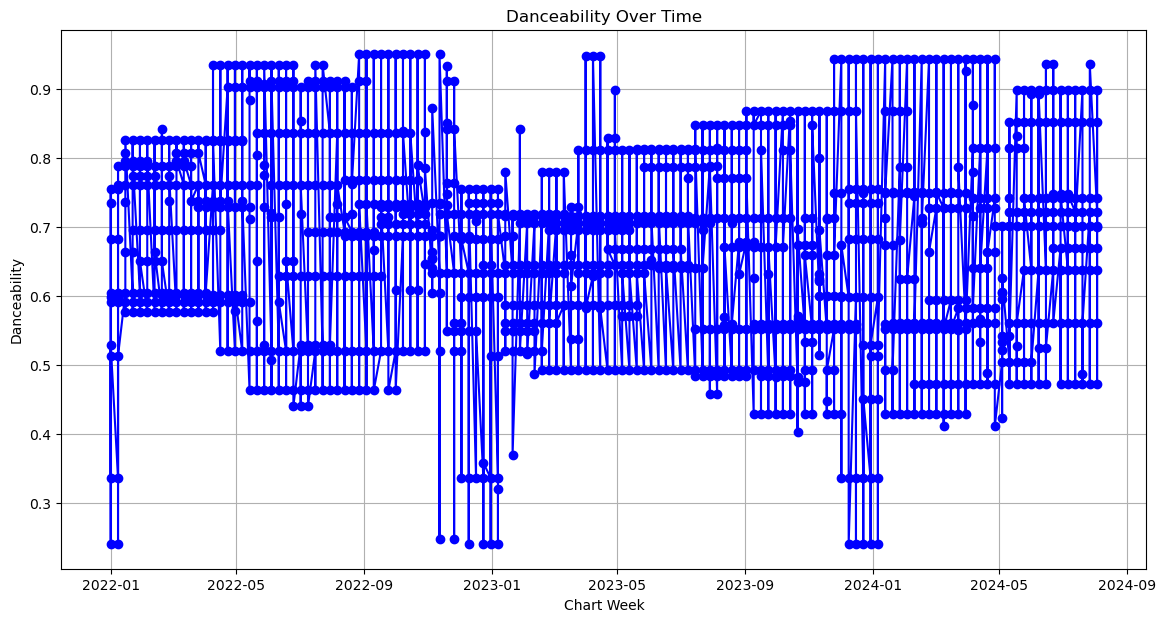

In [6]:
#Danceability over time - all values

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['danceability'], marker='o', linestyle='-', color='b')
plt.xlabel('Chart Week')
plt.ylabel('Danceability')
plt.title('Danceability Over Time')
plt.grid(True)
plt.show()

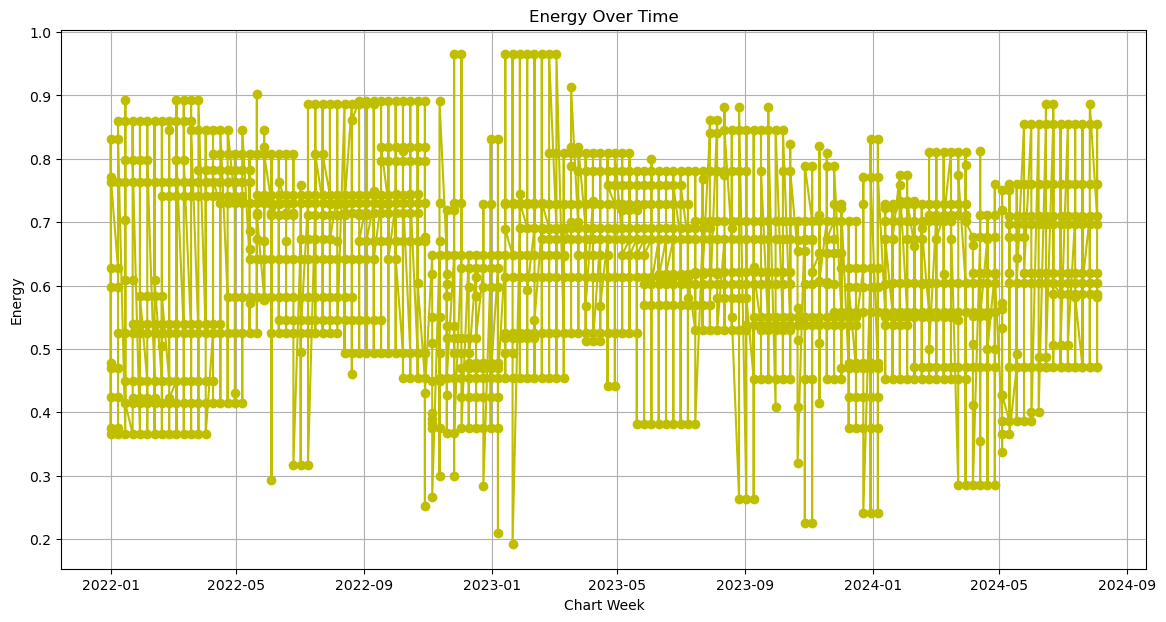

In [7]:

#Energy over time - all values

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['energy'], marker='o', linestyle='-', color='y')
plt.xlabel('Chart Week')
plt.ylabel('Energy')
plt.title('Energy Over Time')
plt.grid(True)
plt.show()

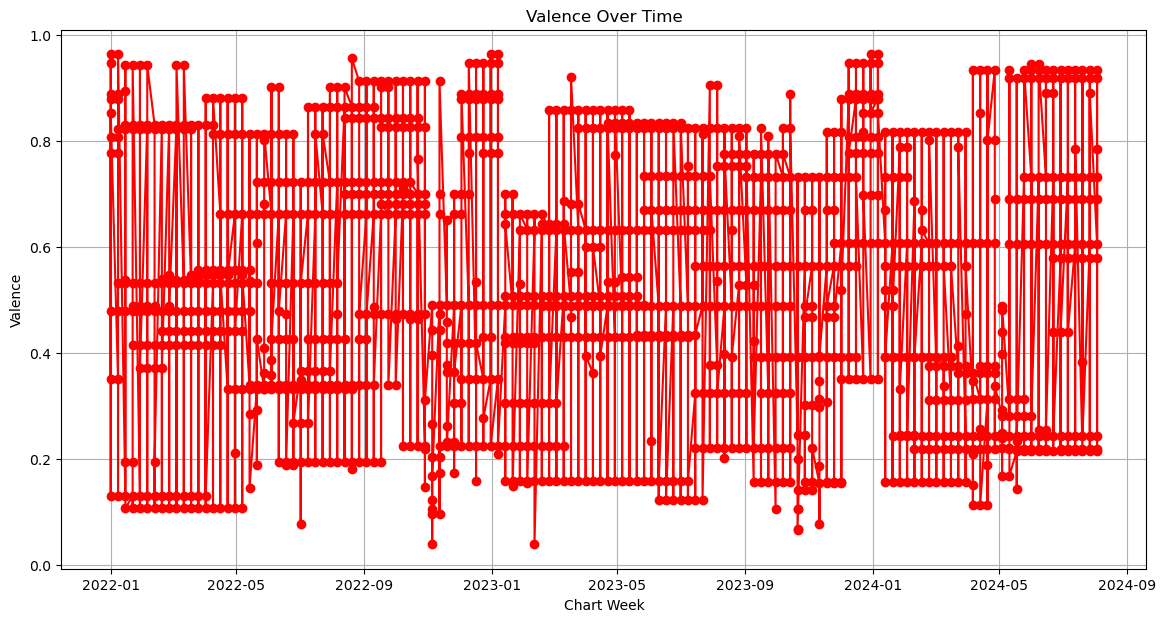

In [8]:

#Valence over time - all values

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['valence'], marker='o', linestyle='-', color='r')
plt.xlabel('Chart Week')
plt.ylabel('Valence')
plt.title('Valence Over Time')
plt.grid(True)
plt.show()

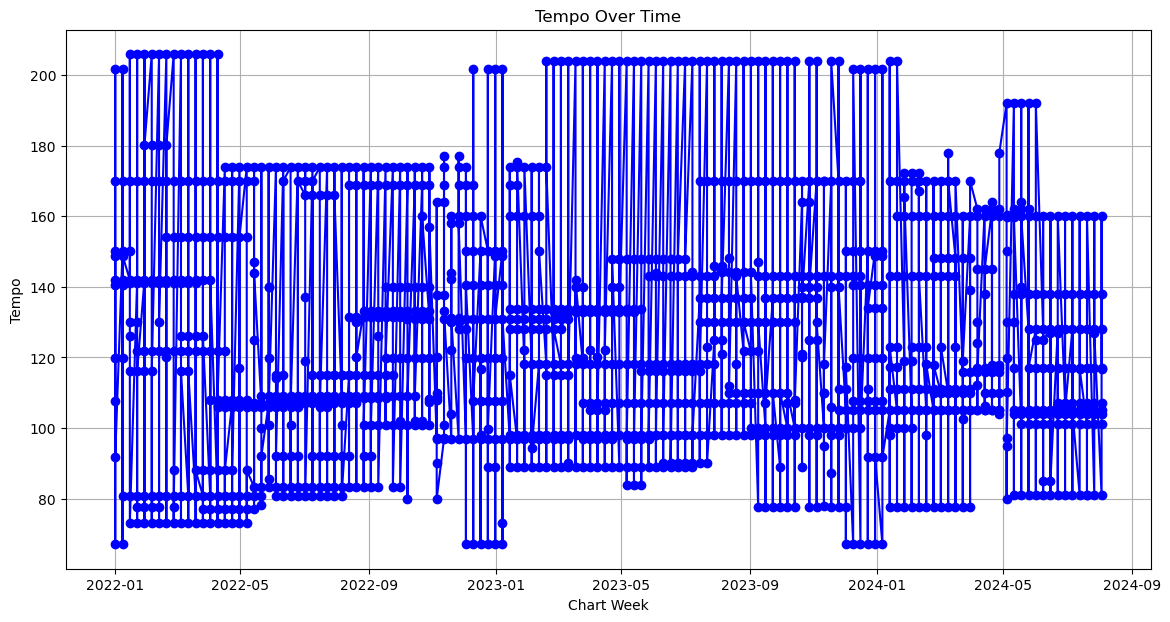

In [9]:

#Tempo over time - all values

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['tempo'], marker='o', linestyle='-', color='b')
plt.xlabel('Chart Week')
plt.ylabel('Tempo')
plt.title('Tempo Over Time')
plt.grid(True)
plt.show()

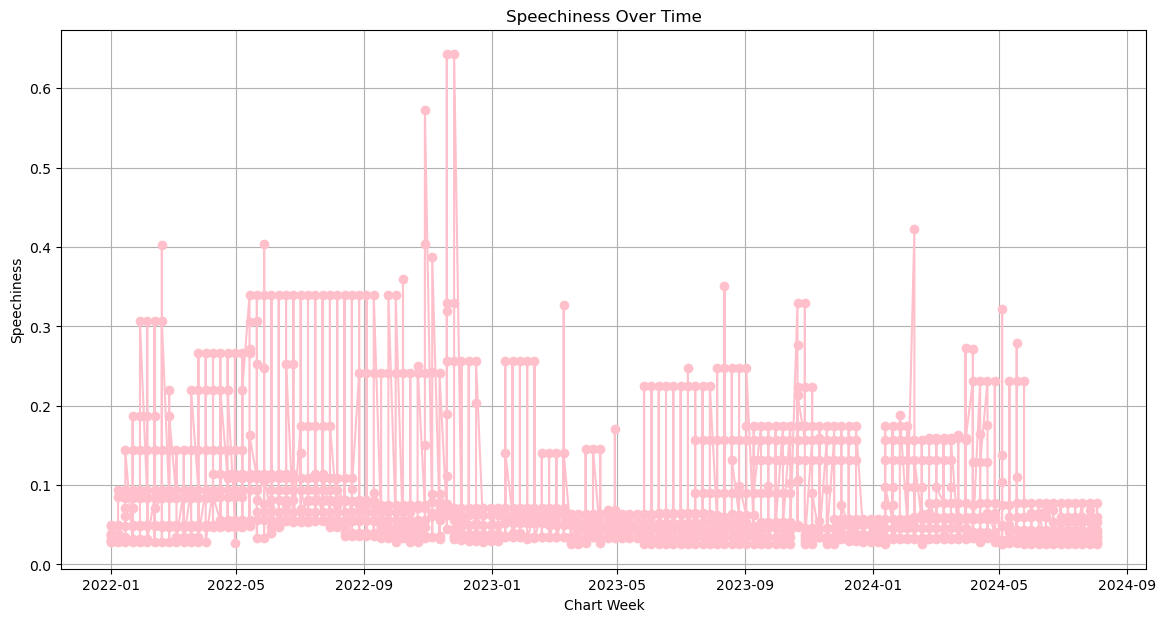

In [10]:

#Speechiness over time - all values

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['speechiness'], marker='o', linestyle='-', color='pink')
plt.xlabel('Chart Week')
plt.ylabel('Speechiness')
plt.title('Speechiness Over Time')
plt.grid(True)
plt.show()

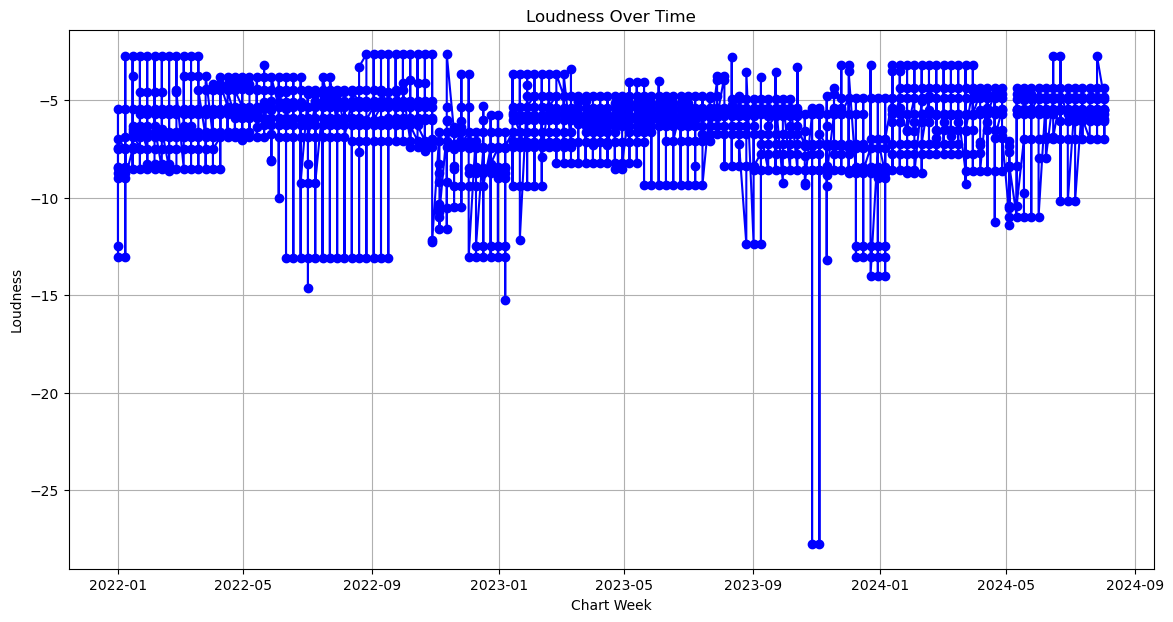

In [11]:

#Loudness over time - all values

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['loudness'], marker='o', linestyle='-', color='b')
plt.xlabel('Chart Week')
plt.ylabel('Loudness')
plt.title('Loudness Over Time')
plt.grid(True)
plt.show()

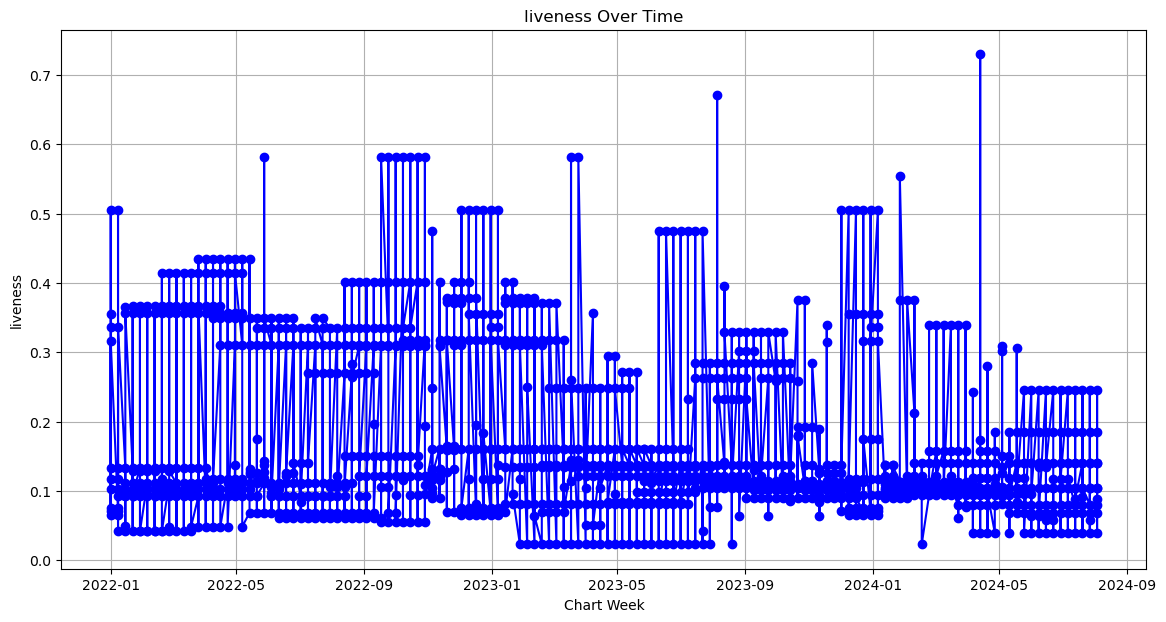

In [12]:
#liveness over time


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['liveness'], marker='o', linestyle='-', color='b')
plt.xlabel('Chart Week')
plt.ylabel('liveness')
plt.title('liveness Over Time')
plt.grid(True)
plt.show()

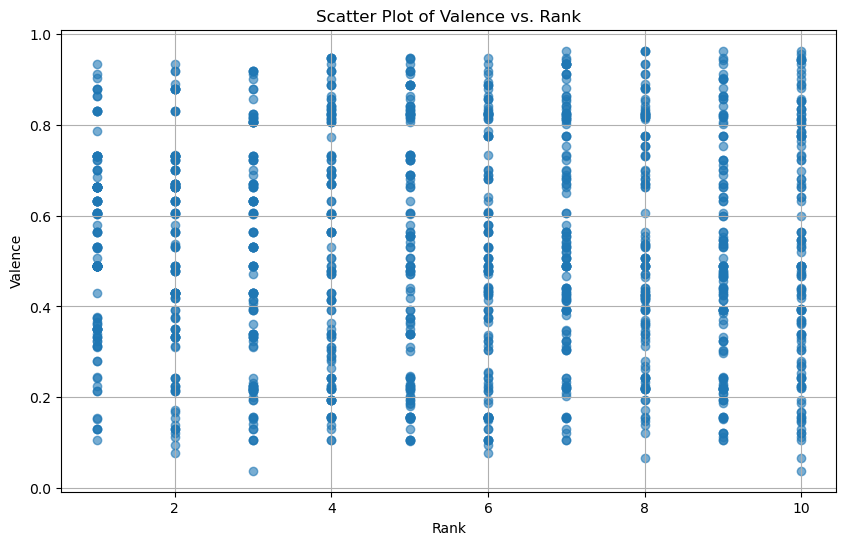

In [13]:

#Valence vs. Rank
plt.figure(figsize=(10, 6))
plt.scatter(df['current_week'], df['valence'], alpha=0.6)
plt.xlabel('Rank')
plt.ylabel('Valence')
plt.title('Scatter Plot of Valence vs. Rank')
plt.grid(True)
plt.show()

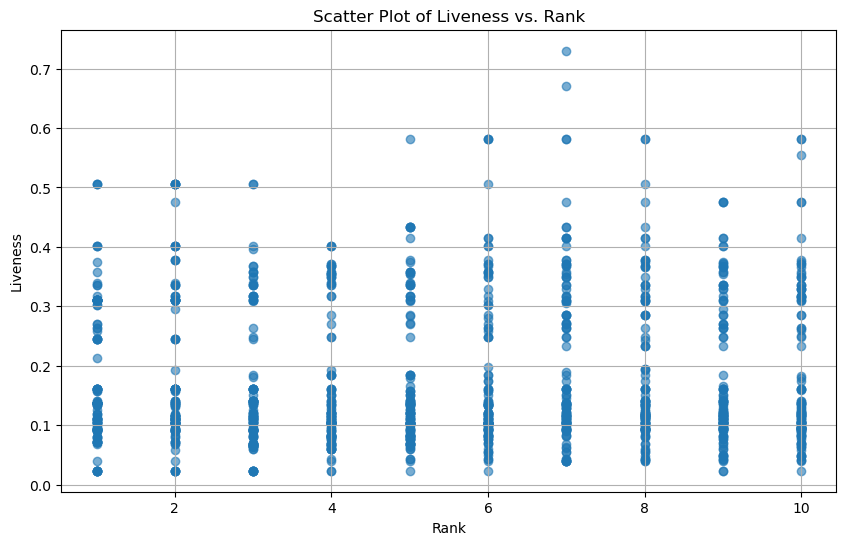

In [14]:
# Scatter plot for Liveness vs. Rank
plt.figure(figsize=(10, 6))
plt.scatter(df['current_week'], df['liveness'], alpha=0.6)
plt.xlabel('Rank')
plt.ylabel('Liveness')
plt.title('Scatter Plot of Liveness vs. Rank')
plt.grid(True)
plt.show()

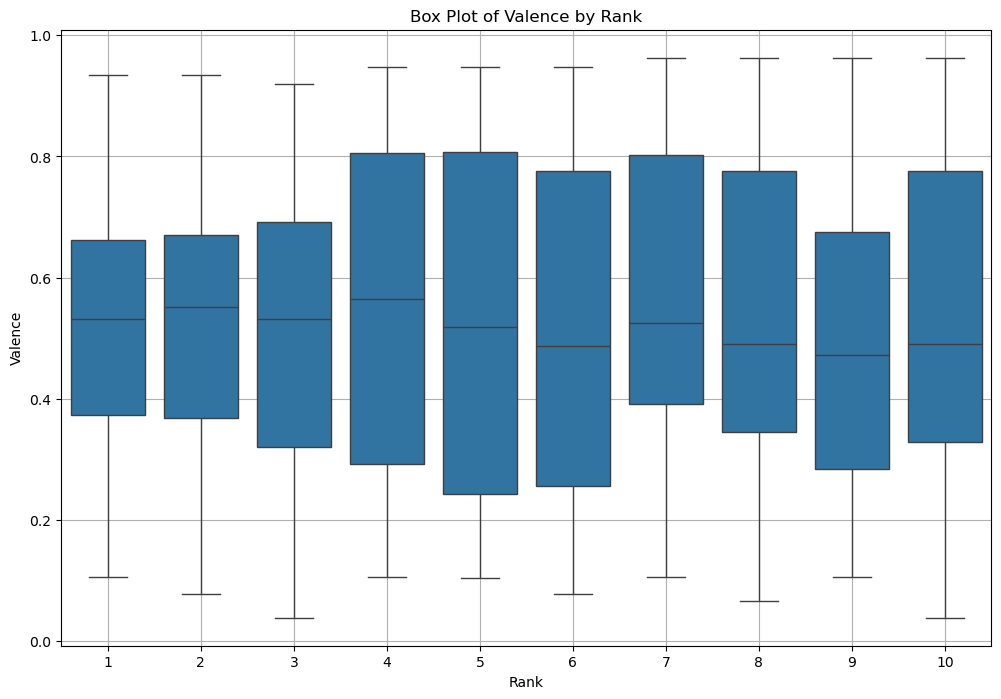

In [15]:

# Box plot for Valence by Rank
plt.figure(figsize=(12, 8))
sns.boxplot(x='current_week', y='valence', data=df)
plt.xlabel('Rank')
plt.ylabel('Valence')
plt.title('Box Plot of Valence by Rank')
plt.grid(True)
plt.show()

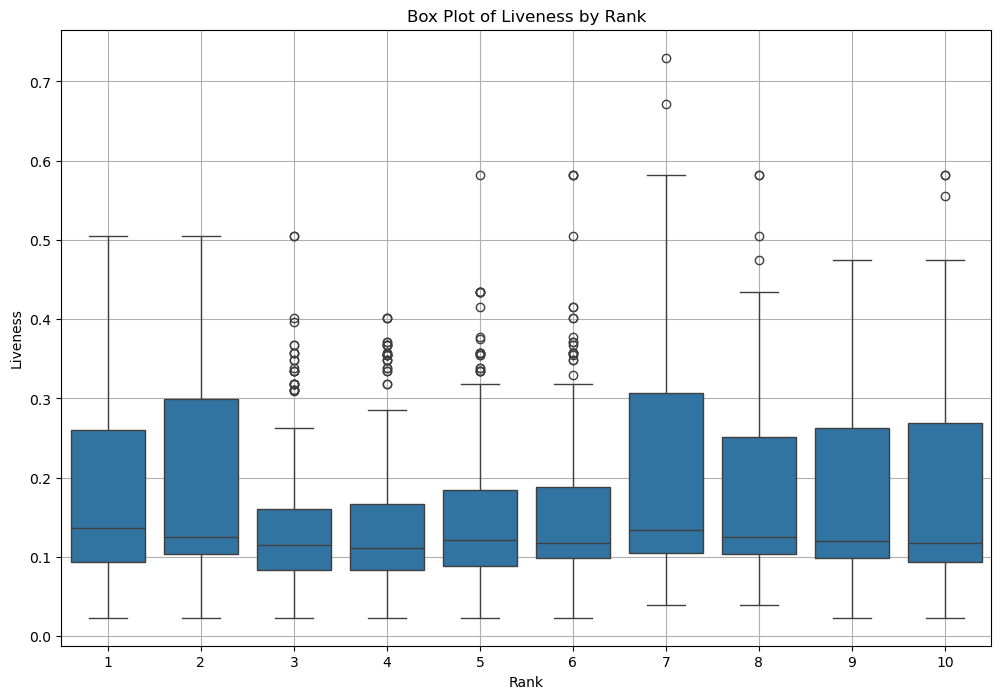

In [16]:
# Box plot for Liveness by Rank
plt.figure(figsize=(12, 8))
sns.boxplot(x='current_week', y='liveness', data=df)
plt.xlabel('Rank')
plt.ylabel('Liveness')
plt.title('Box Plot of Liveness by Rank')
plt.grid(True)
plt.show()

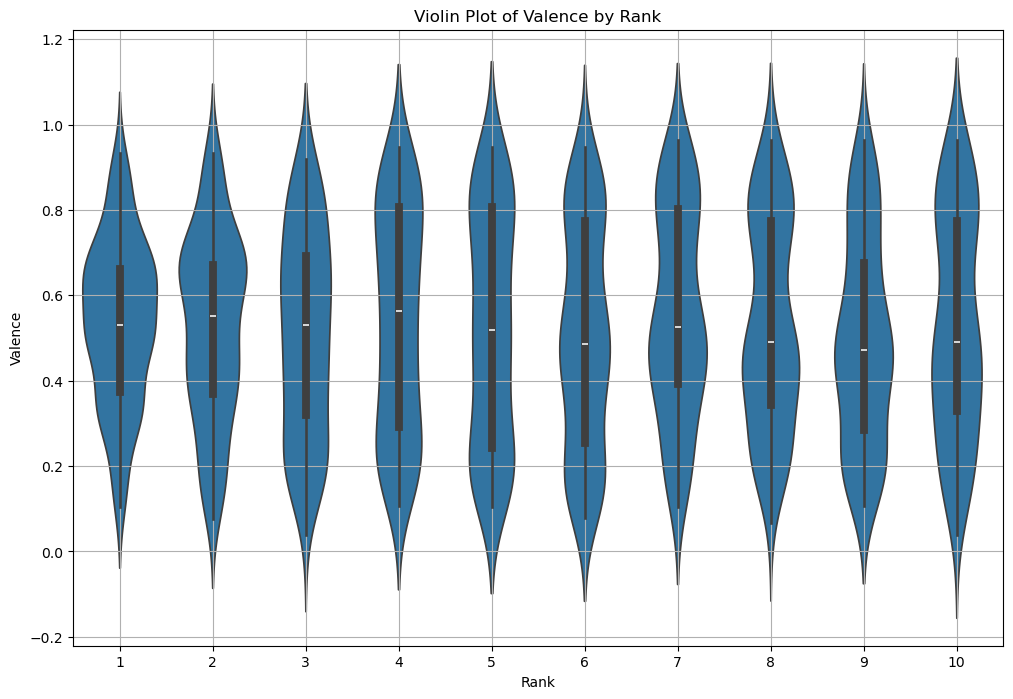

In [17]:
# Violin plot for Valence by Rank
plt.figure(figsize=(12, 8))
sns.violinplot(x='current_week', y='valence', data=df)
plt.xlabel('Rank')
plt.ylabel('Valence')
plt.title('Violin Plot of Valence by Rank')
plt.grid(True)
plt.show()

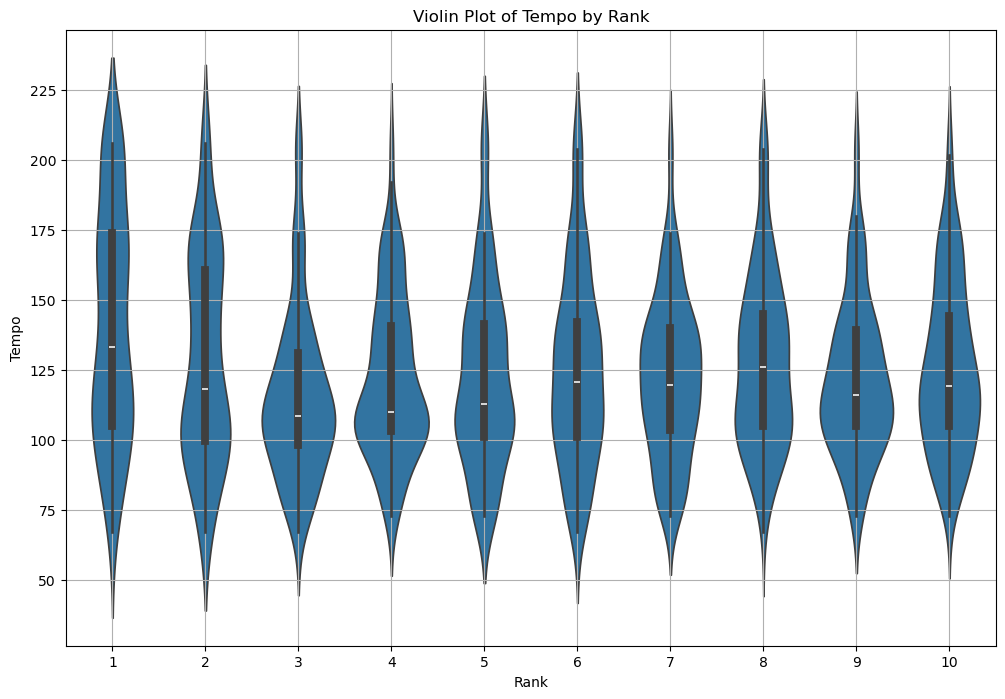

In [18]:
# Violin plot for Tempo by Rank
plt.figure(figsize=(12, 8))
sns.violinplot(x='current_week', y='tempo', data=df)
plt.xlabel('Rank')
plt.ylabel('Tempo')
plt.title('Violin Plot of Tempo by Rank')
plt.grid(True)
plt.show()

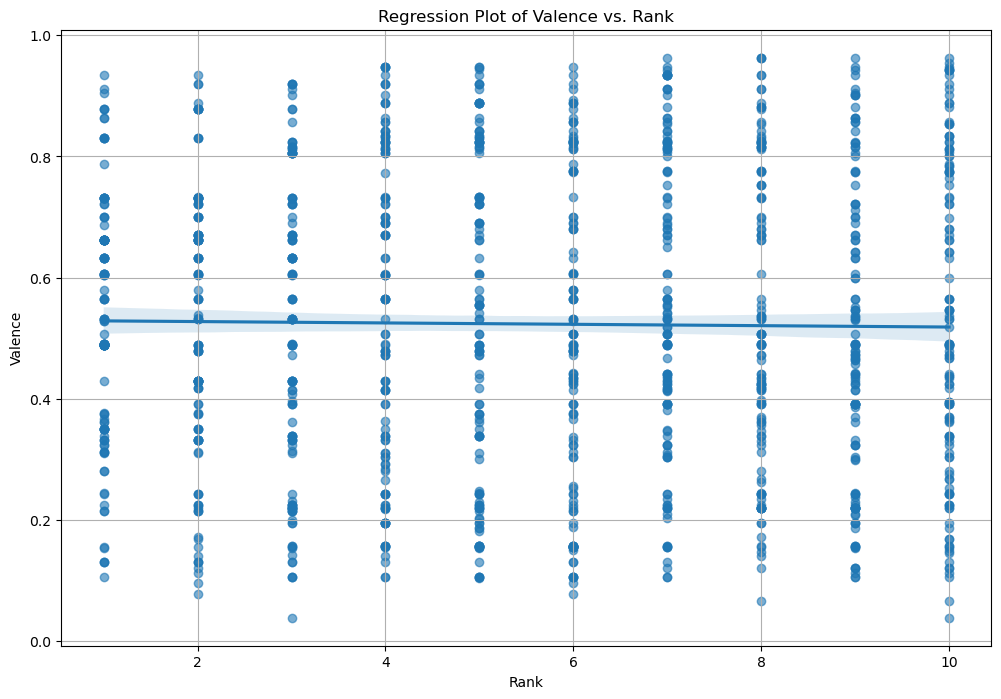

In [19]:
# Regression plot for Valence vs. Rank
plt.figure(figsize=(12, 8))
sns.regplot(x='current_week', y='valence', data=df, scatter_kws={'alpha':0.6})
plt.xlabel('Rank')
plt.ylabel('Valence')
plt.title('Regression Plot of Valence vs. Rank')
plt.grid(True)
plt.show()

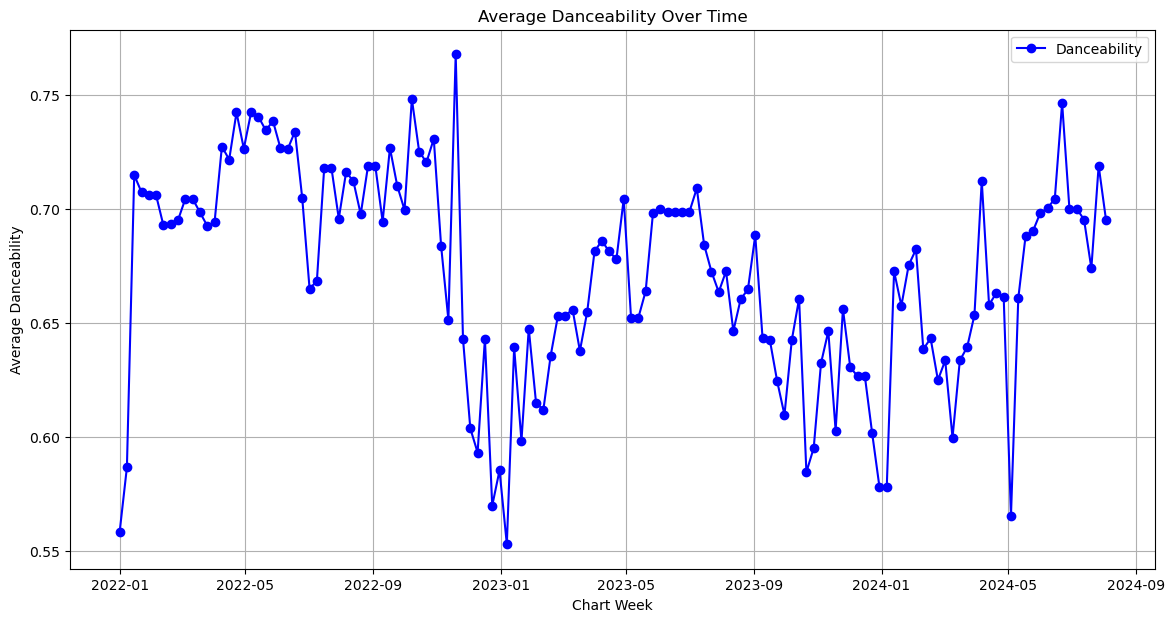

In [20]:
#Danceability - average

plt.figure(figsize=(14, 7))
plt.plot(weekly_averages.index, weekly_averages['danceability'], marker='o', linestyle='-', color='b', label='Danceability')
plt.xlabel('Chart Week')
plt.ylabel('Average Danceability')
plt.title('Average Danceability Over Time')
plt.grid(True)
plt.legend()
plt.show()

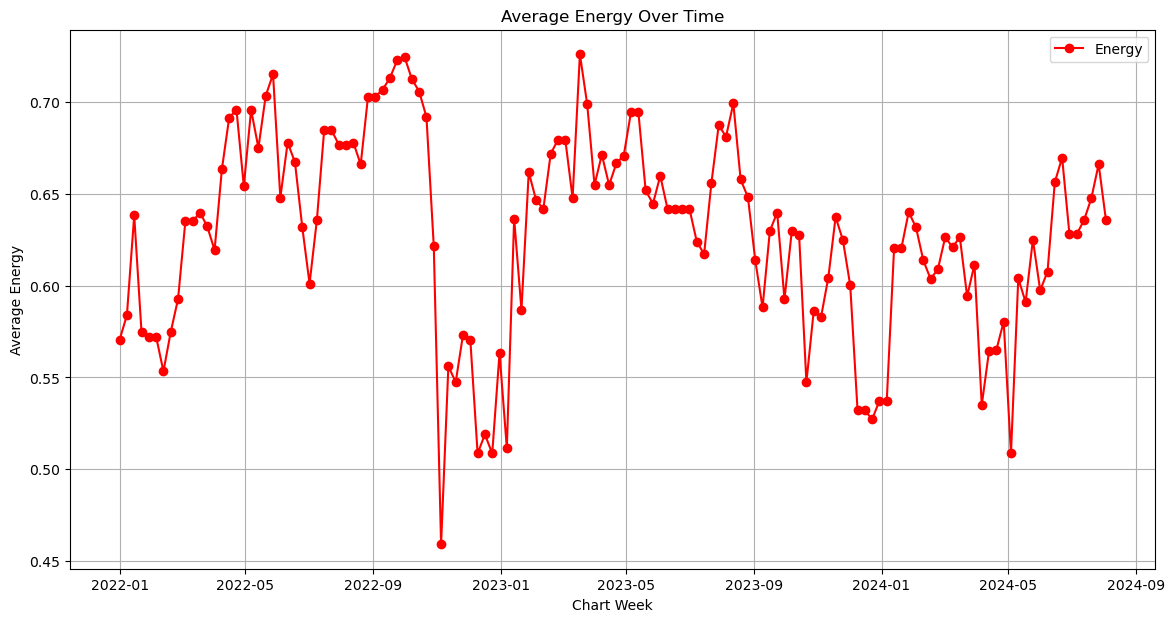

In [21]:
# Plot energy over time
plt.figure(figsize=(14, 7))
plt.plot(weekly_averages.index, weekly_averages['energy'], marker='o', linestyle='-', color='r', label='Energy')
plt.xlabel('Chart Week')
plt.ylabel('Average Energy')
plt.title('Average Energy Over Time')
plt.grid(True)
plt.legend()
plt.show()

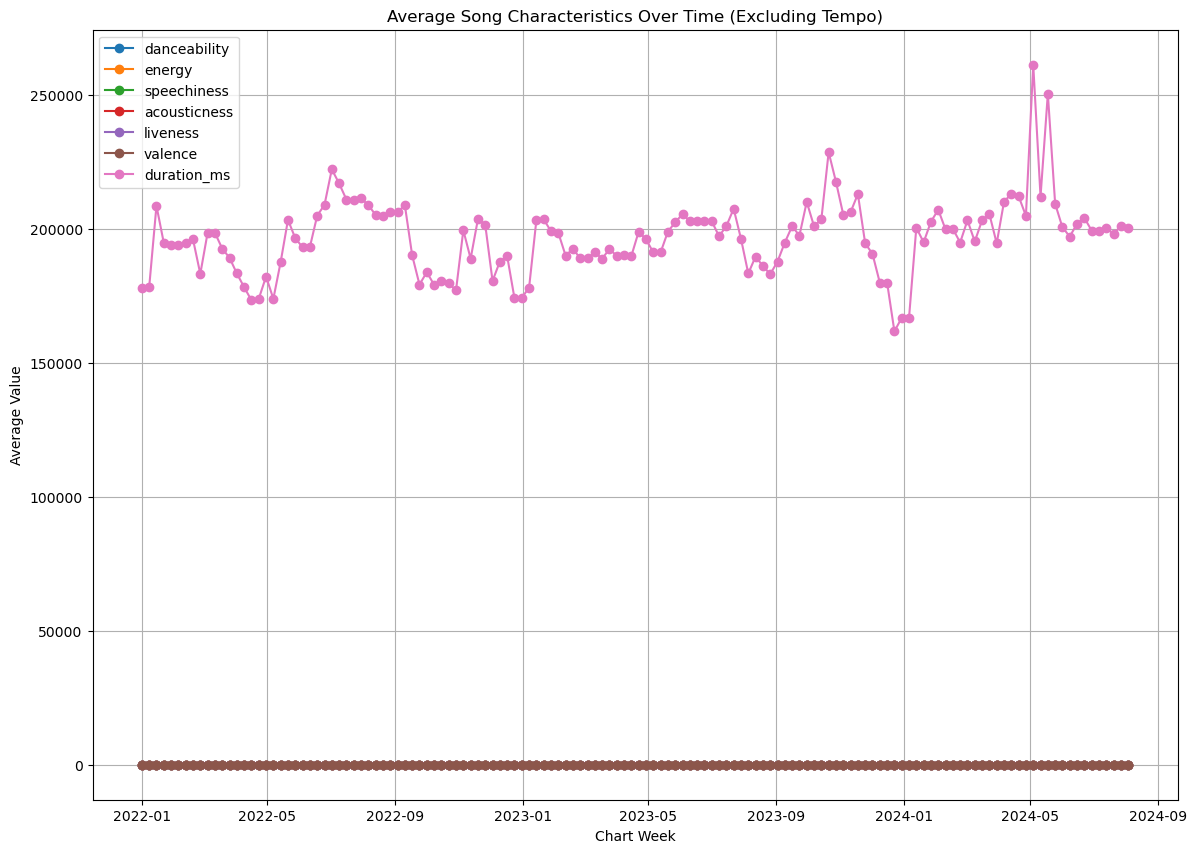

In [22]:
columns_to_plot = [col for col in columns_to_convert if (col != 'tempo' and col != 'loudness')]


# Plot each column excluding 'tempo'
plt.figure(figsize=(14, 10))
for column in columns_to_plot:
    plt.plot(weekly_averages.index, weekly_averages[column], marker='o', linestyle='-', label=column)

plt.xlabel('Chart Week')
plt.ylabel('Average Value')
plt.title('Average Song Characteristics Over Time (Excluding Tempo)')
plt.grid(True)
plt.legend()
plt.show()

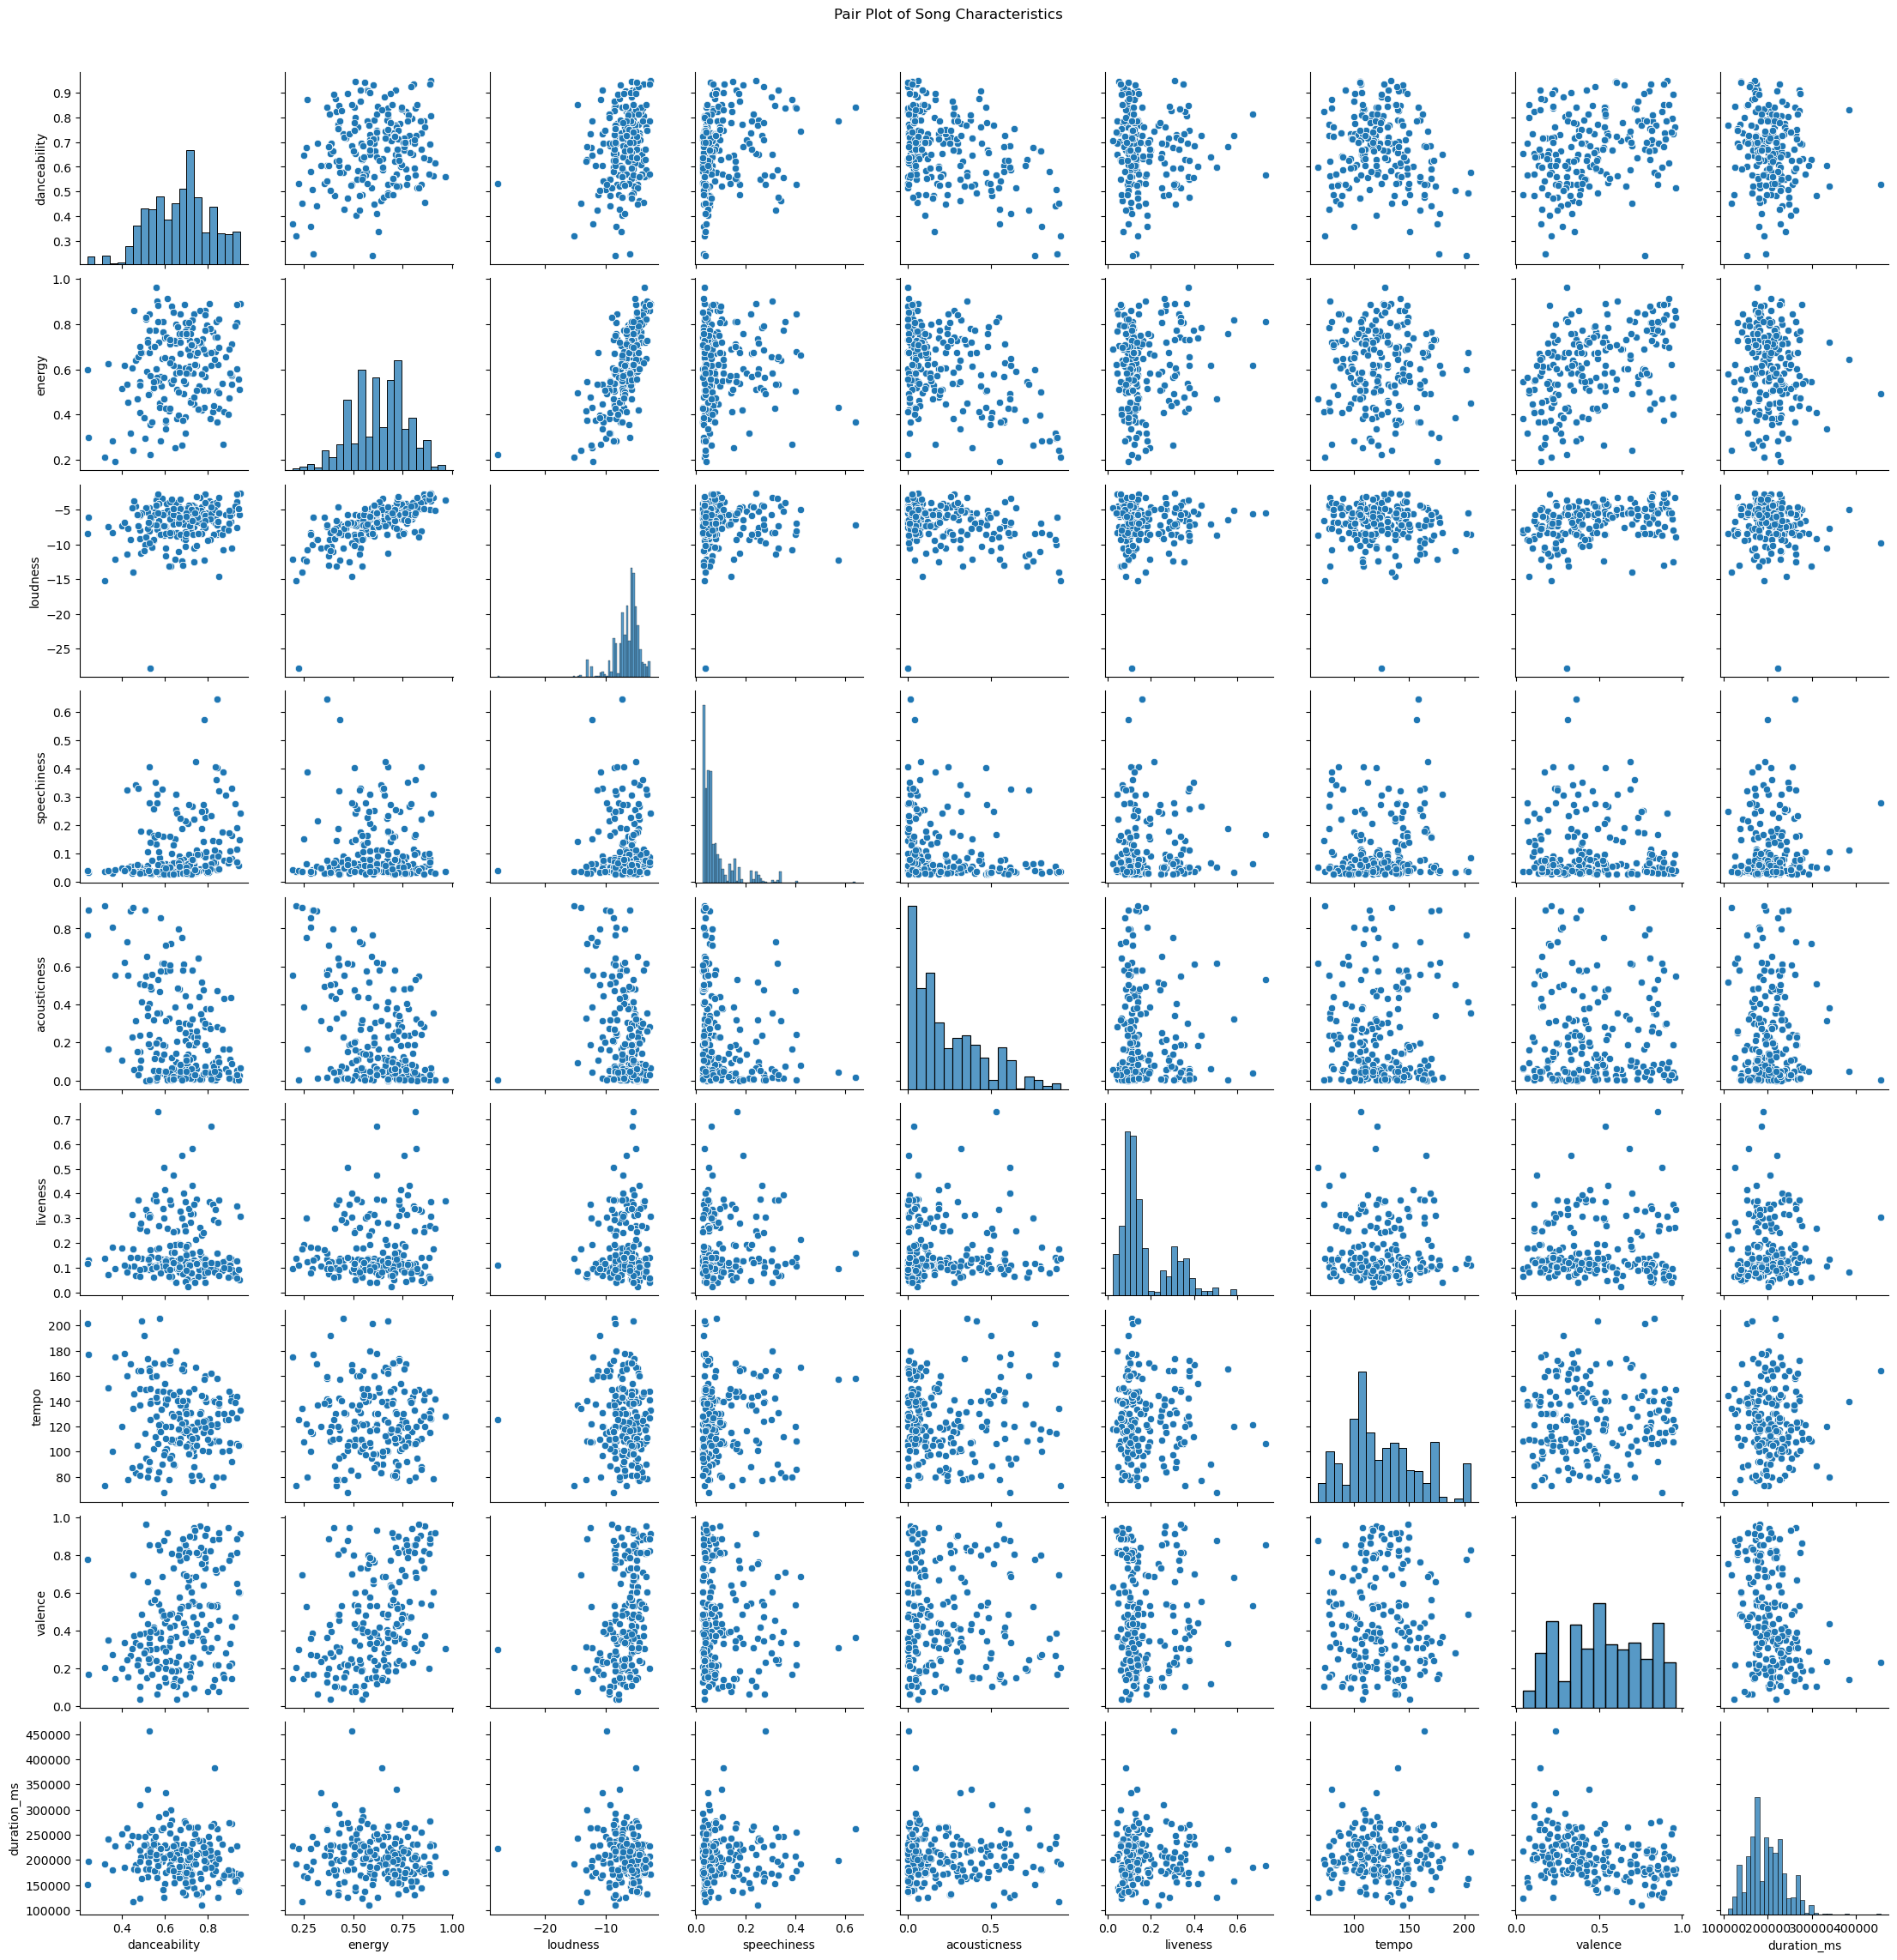

In [23]:
sns.pairplot(df[columns_to_convert])
plt.suptitle('Pair Plot of Song Characteristics', y=1.02)
plt.show()

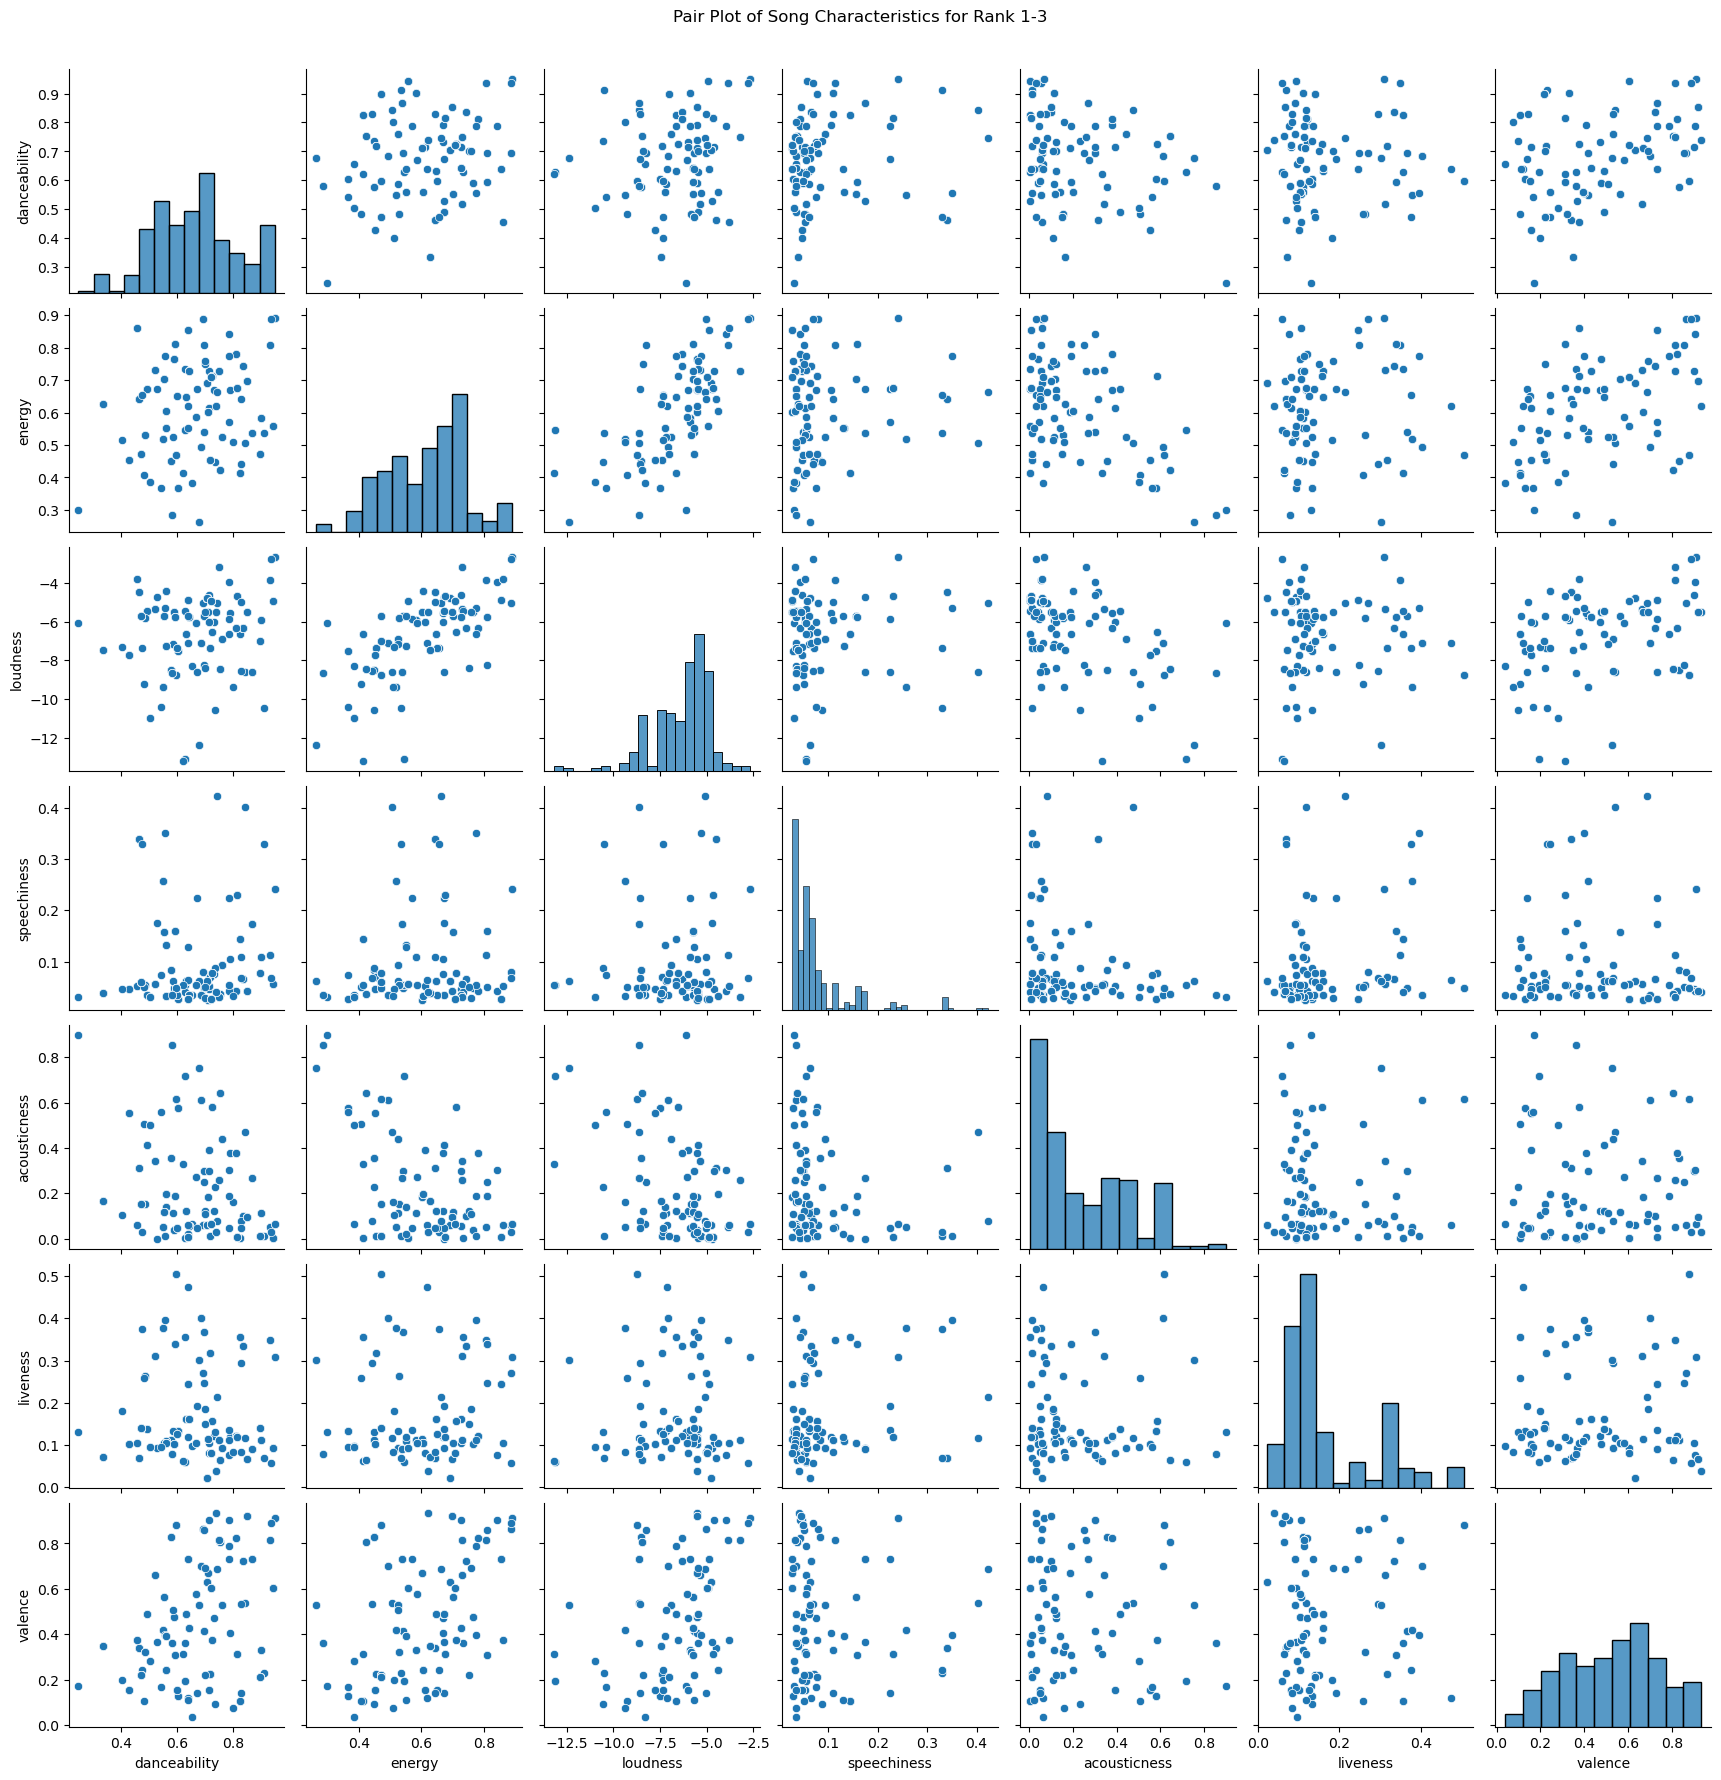

In [24]:

# Filter data for rank 1-3
rank_1_3 = df[df['current_week'].between(1, 3)]

# List of relevant columns to plot
columns_to_plot = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence']

# Create pair plot for rank 1-3
sns.pairplot(rank_1_3[columns_to_plot])
plt.suptitle('Pair Plot of Song Characteristics for Rank 1-3', y=1.02) 
plt.show()

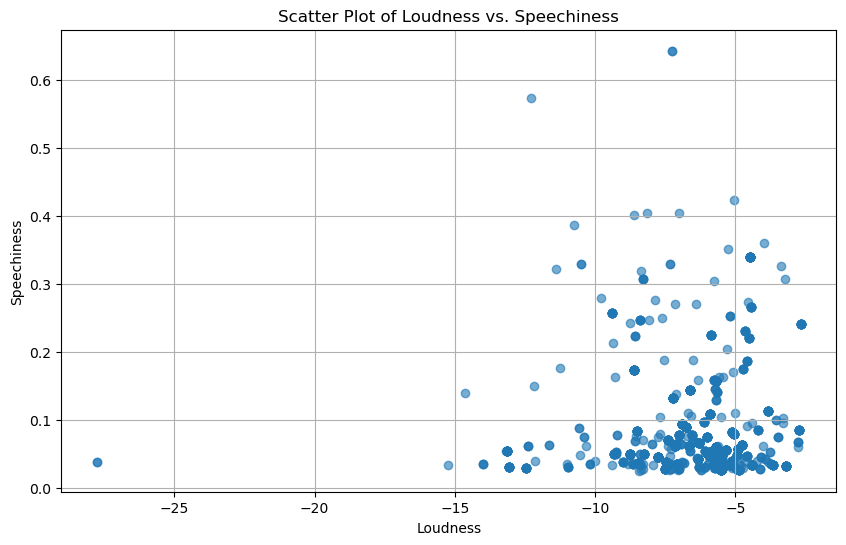

In [25]:
# Scatter plot for Loudness vs. Speechiness
plt.figure(figsize=(10, 6))
plt.scatter(df['loudness'], df['speechiness'], alpha=0.6)
plt.xlabel('Loudness')
plt.ylabel('Speechiness')
plt.title('Scatter Plot of Loudness vs. Speechiness')
plt.grid(True)
plt.show()

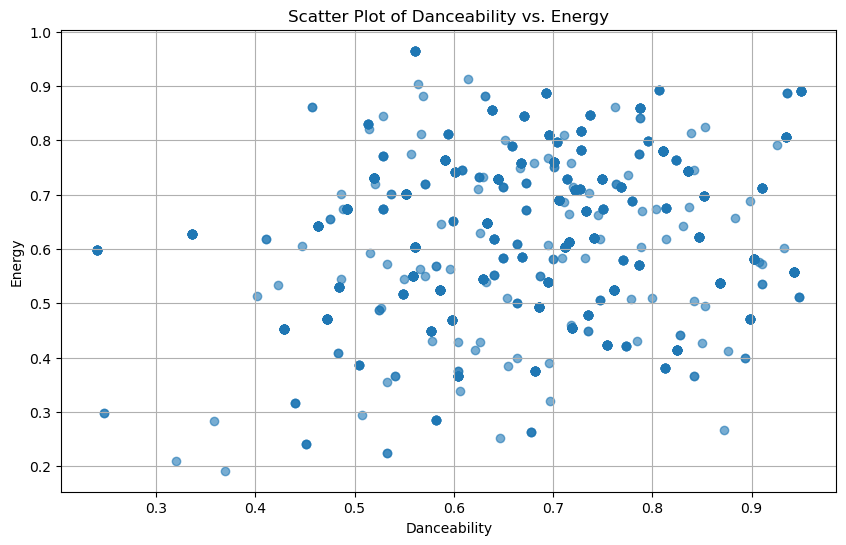

In [26]:

# Scatter plot for Danceability vs. Energy
plt.figure(figsize=(10, 6))
plt.scatter(df['danceability'], df['energy'], alpha=0.6)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Scatter Plot of Danceability vs. Energy')
plt.grid(True)
plt.show()



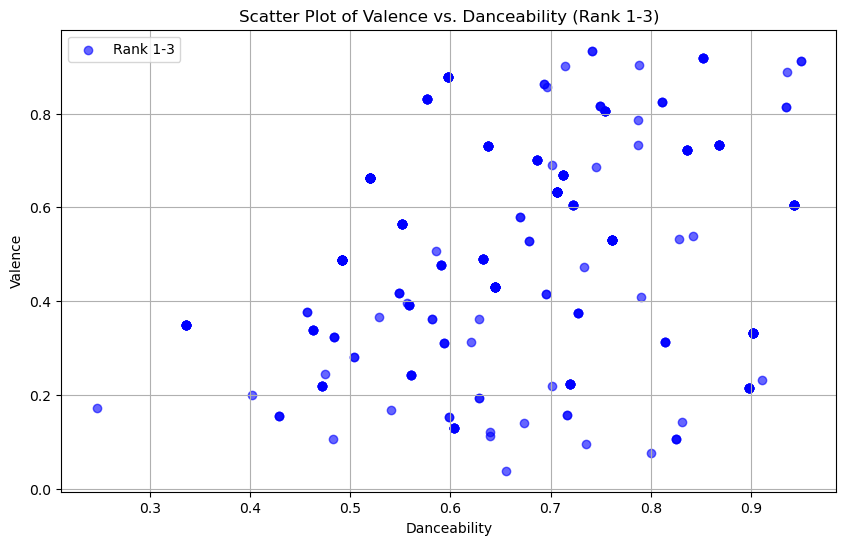

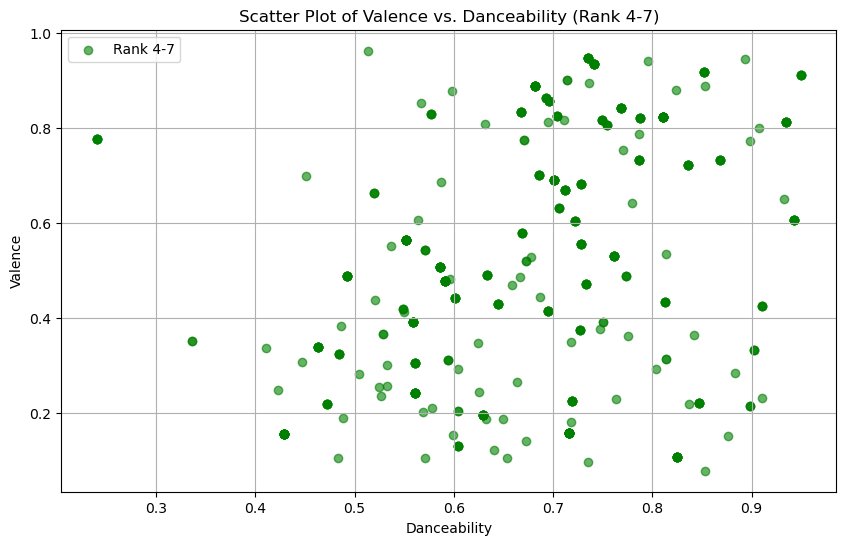

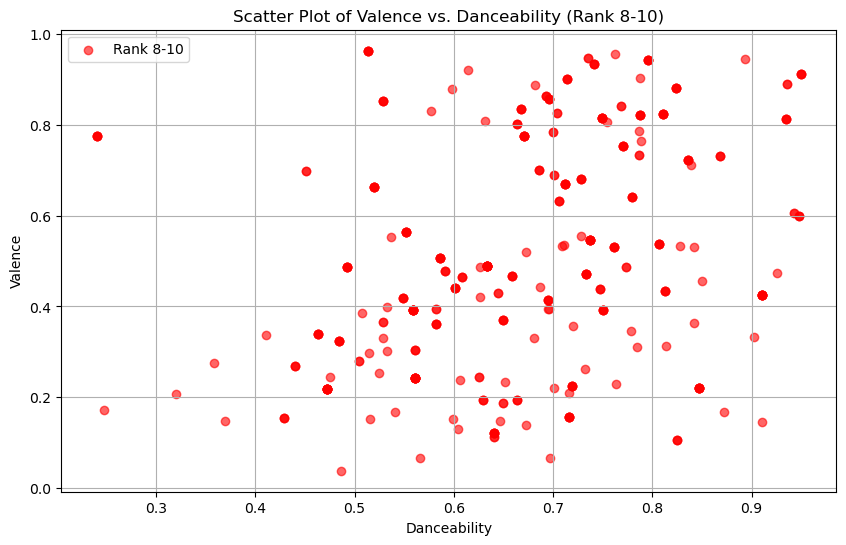

In [27]:
rank_1_3 = df[df['current_week'].between(1, 3)]

rank_4_7 = df[df['current_week'].between(4, 7)]

rank_8_10 = df[df['current_week'].between(8, 10)]

# Plot Scatter Plot for rank 1-3
plt.figure(figsize=(10, 6))
plt.scatter(rank_1_3['danceability'], rank_1_3['valence'], alpha=0.6, label='Rank 1-3', color='blue')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.title('Scatter Plot of Valence vs. Danceability (Rank 1-3)')
plt.grid(True)
plt.legend()
plt.show()

# Plot Scatter Plot for rank 4-7
plt.figure(figsize=(10, 6))
plt.scatter(rank_4_7['danceability'], rank_4_7['valence'], alpha=0.6, label='Rank 4-7', color='green')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.title('Scatter Plot of Valence vs. Danceability (Rank 4-7)')
plt.grid(True)
plt.legend()
plt.show()

# Plot Scatter Plot for rank 8-10
plt.figure(figsize=(10, 6))
plt.scatter(rank_8_10['danceability'], rank_8_10['valence'], alpha=0.6, label='Rank 8-10', color='red')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.title('Scatter Plot of Valence vs. Danceability (Rank 8-10)')
plt.grid(True)
plt.legend()
plt.show()

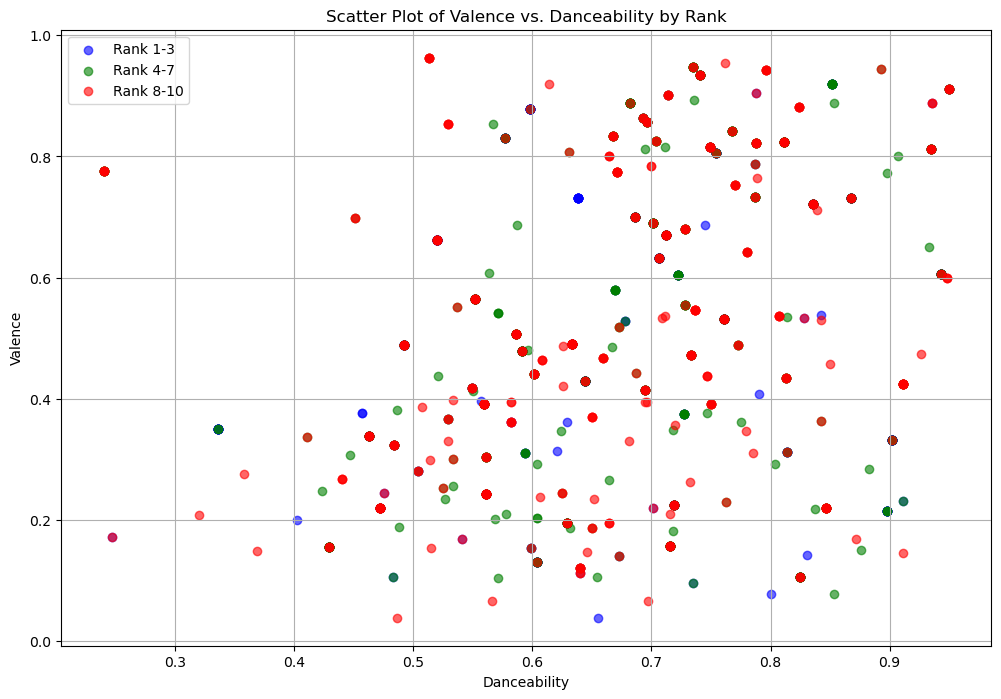

In [28]:

# Plot Scatter Plot for all ranks on the same plot
plt.figure(figsize=(12, 8))

# Scatter for rank 1-3
plt.scatter(rank_1_3['danceability'], rank_1_3['valence'], alpha=0.6, label='Rank 1-3', color='blue')

# Scatter for rank 4-7
plt.scatter(rank_4_7['danceability'], rank_4_7['valence'], alpha=0.6, label='Rank 4-7', color='green')

# Scatter for rank 8-10
plt.scatter(rank_8_10['danceability'], rank_8_10['valence'], alpha=0.6, label='Rank 8-10', color='red')

# Labels and Title
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.title('Scatter Plot of Valence vs. Danceability by Rank')
plt.grid(True)
plt.legend()
plt.show()

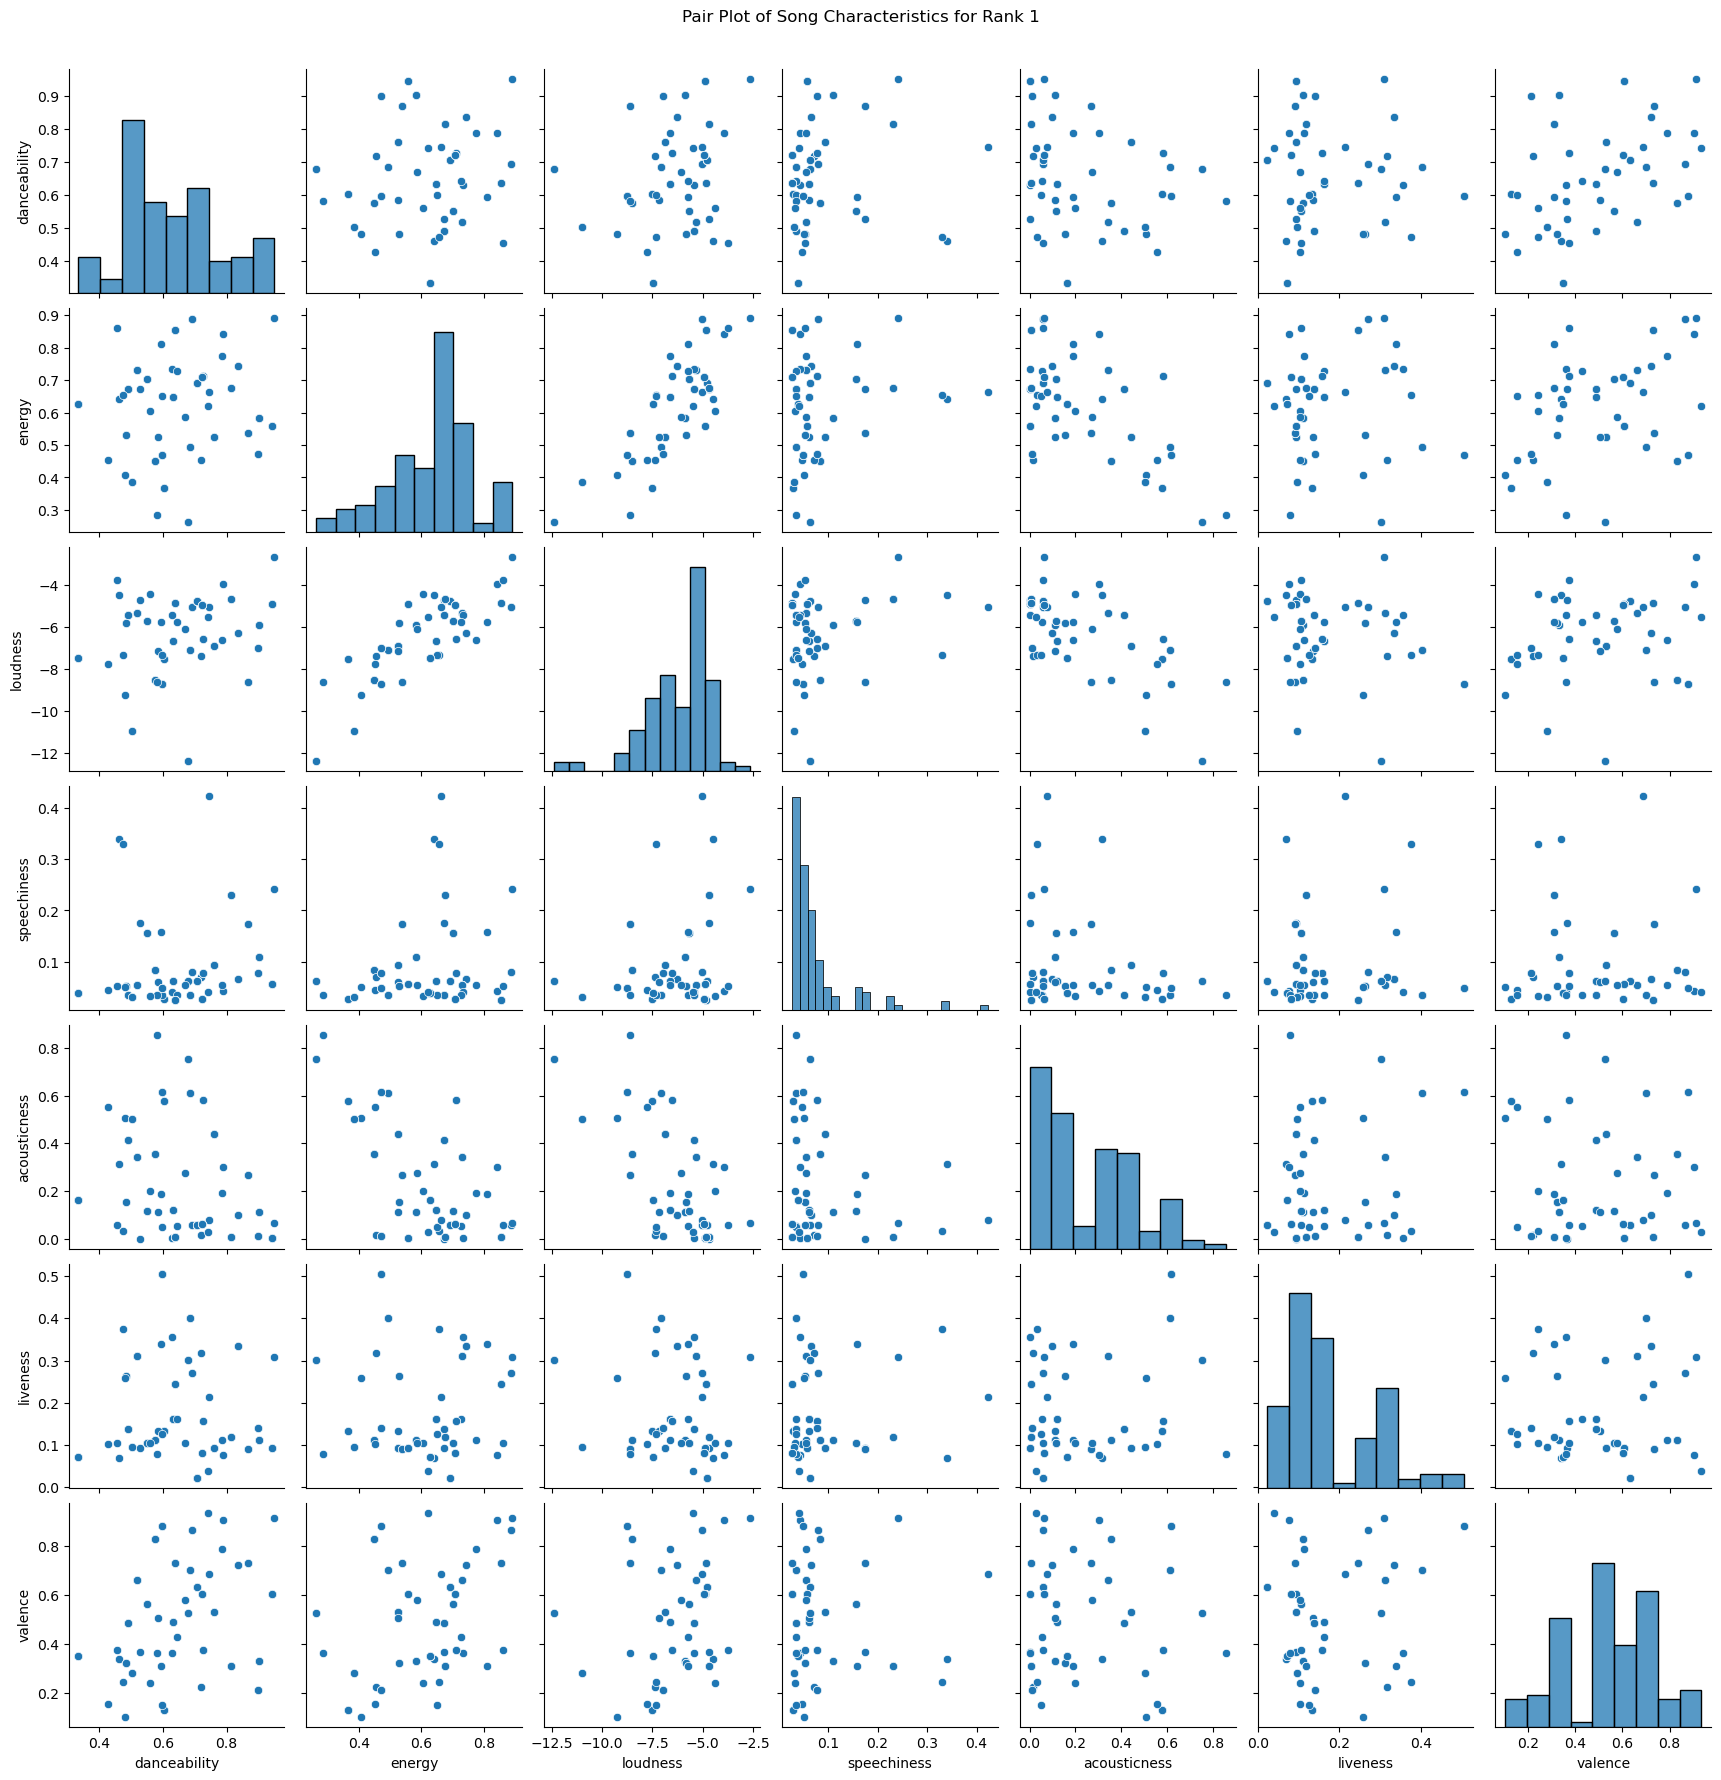

In [29]:
rank_1 = df[df['current_week'] == 1]

# List of relevant columns to plot
columns_to_plot = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence']

# Create pair plot for rank 1
sns.pairplot(rank_1[columns_to_plot])
plt.suptitle('Pair Plot of Song Characteristics for Rank 1', y=1.02)
plt.show()

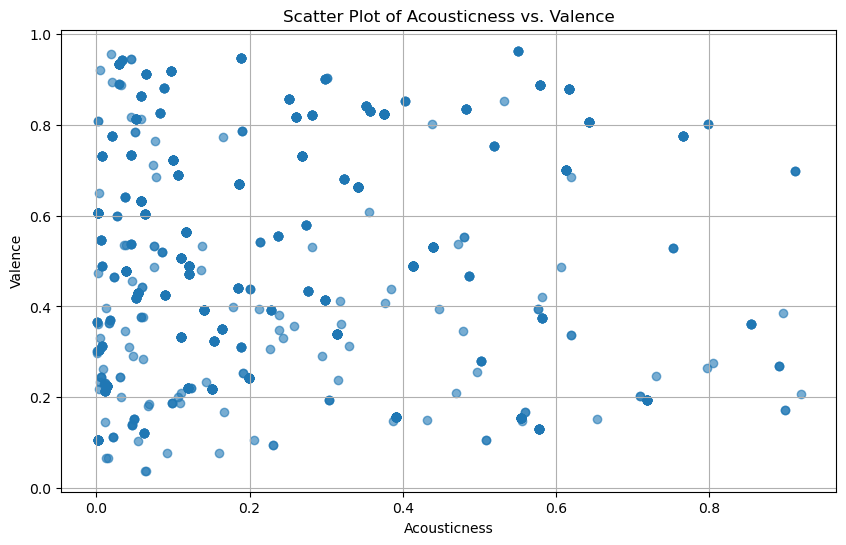

In [30]:
# Scatter plot for Acousticness vs. Valence
plt.figure(figsize=(10, 6))
plt.scatter(df['acousticness'], df['valence'], alpha=0.6)
plt.xlabel('Acousticness')
plt.ylabel('Valence')
plt.title('Scatter Plot of Acousticness vs. Valence')
plt.grid(True)
plt.show()

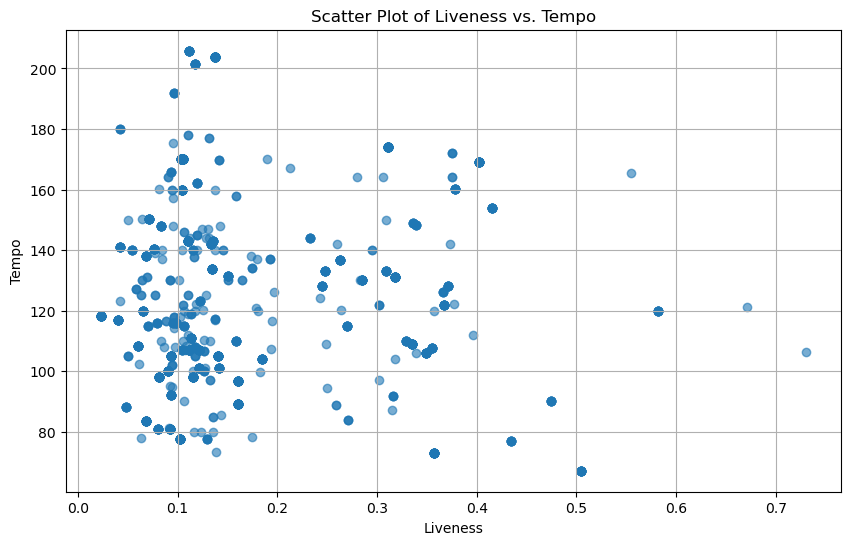

In [31]:
# Scatter plot for Liveness vs. Tempo
plt.figure(figsize=(10, 6))
plt.scatter(df['liveness'], df['tempo'], alpha=0.6)
plt.xlabel('Liveness')
plt.ylabel('Tempo')
plt.title('Scatter Plot of Liveness vs. Tempo')
plt.grid(True)
plt.show()

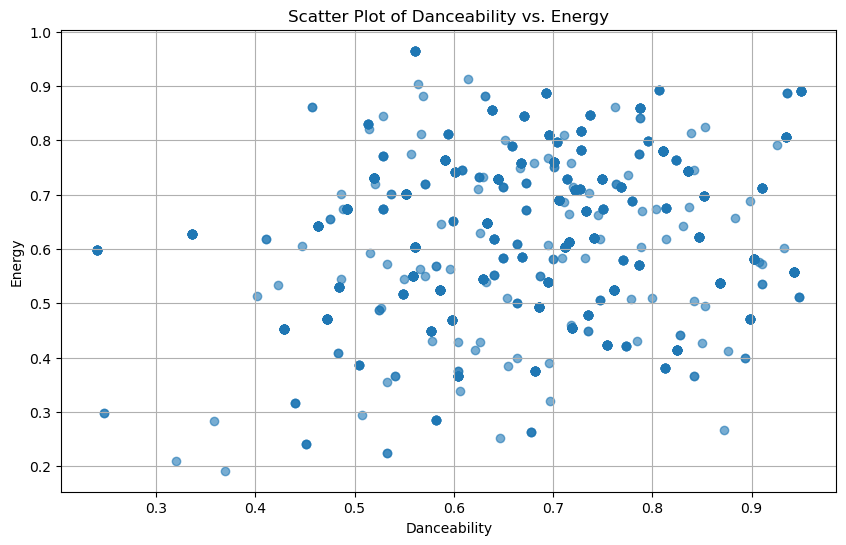

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df['danceability'], df['energy'], alpha=0.6)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Scatter Plot of Danceability vs. Energy')
plt.grid(True)
plt.show()

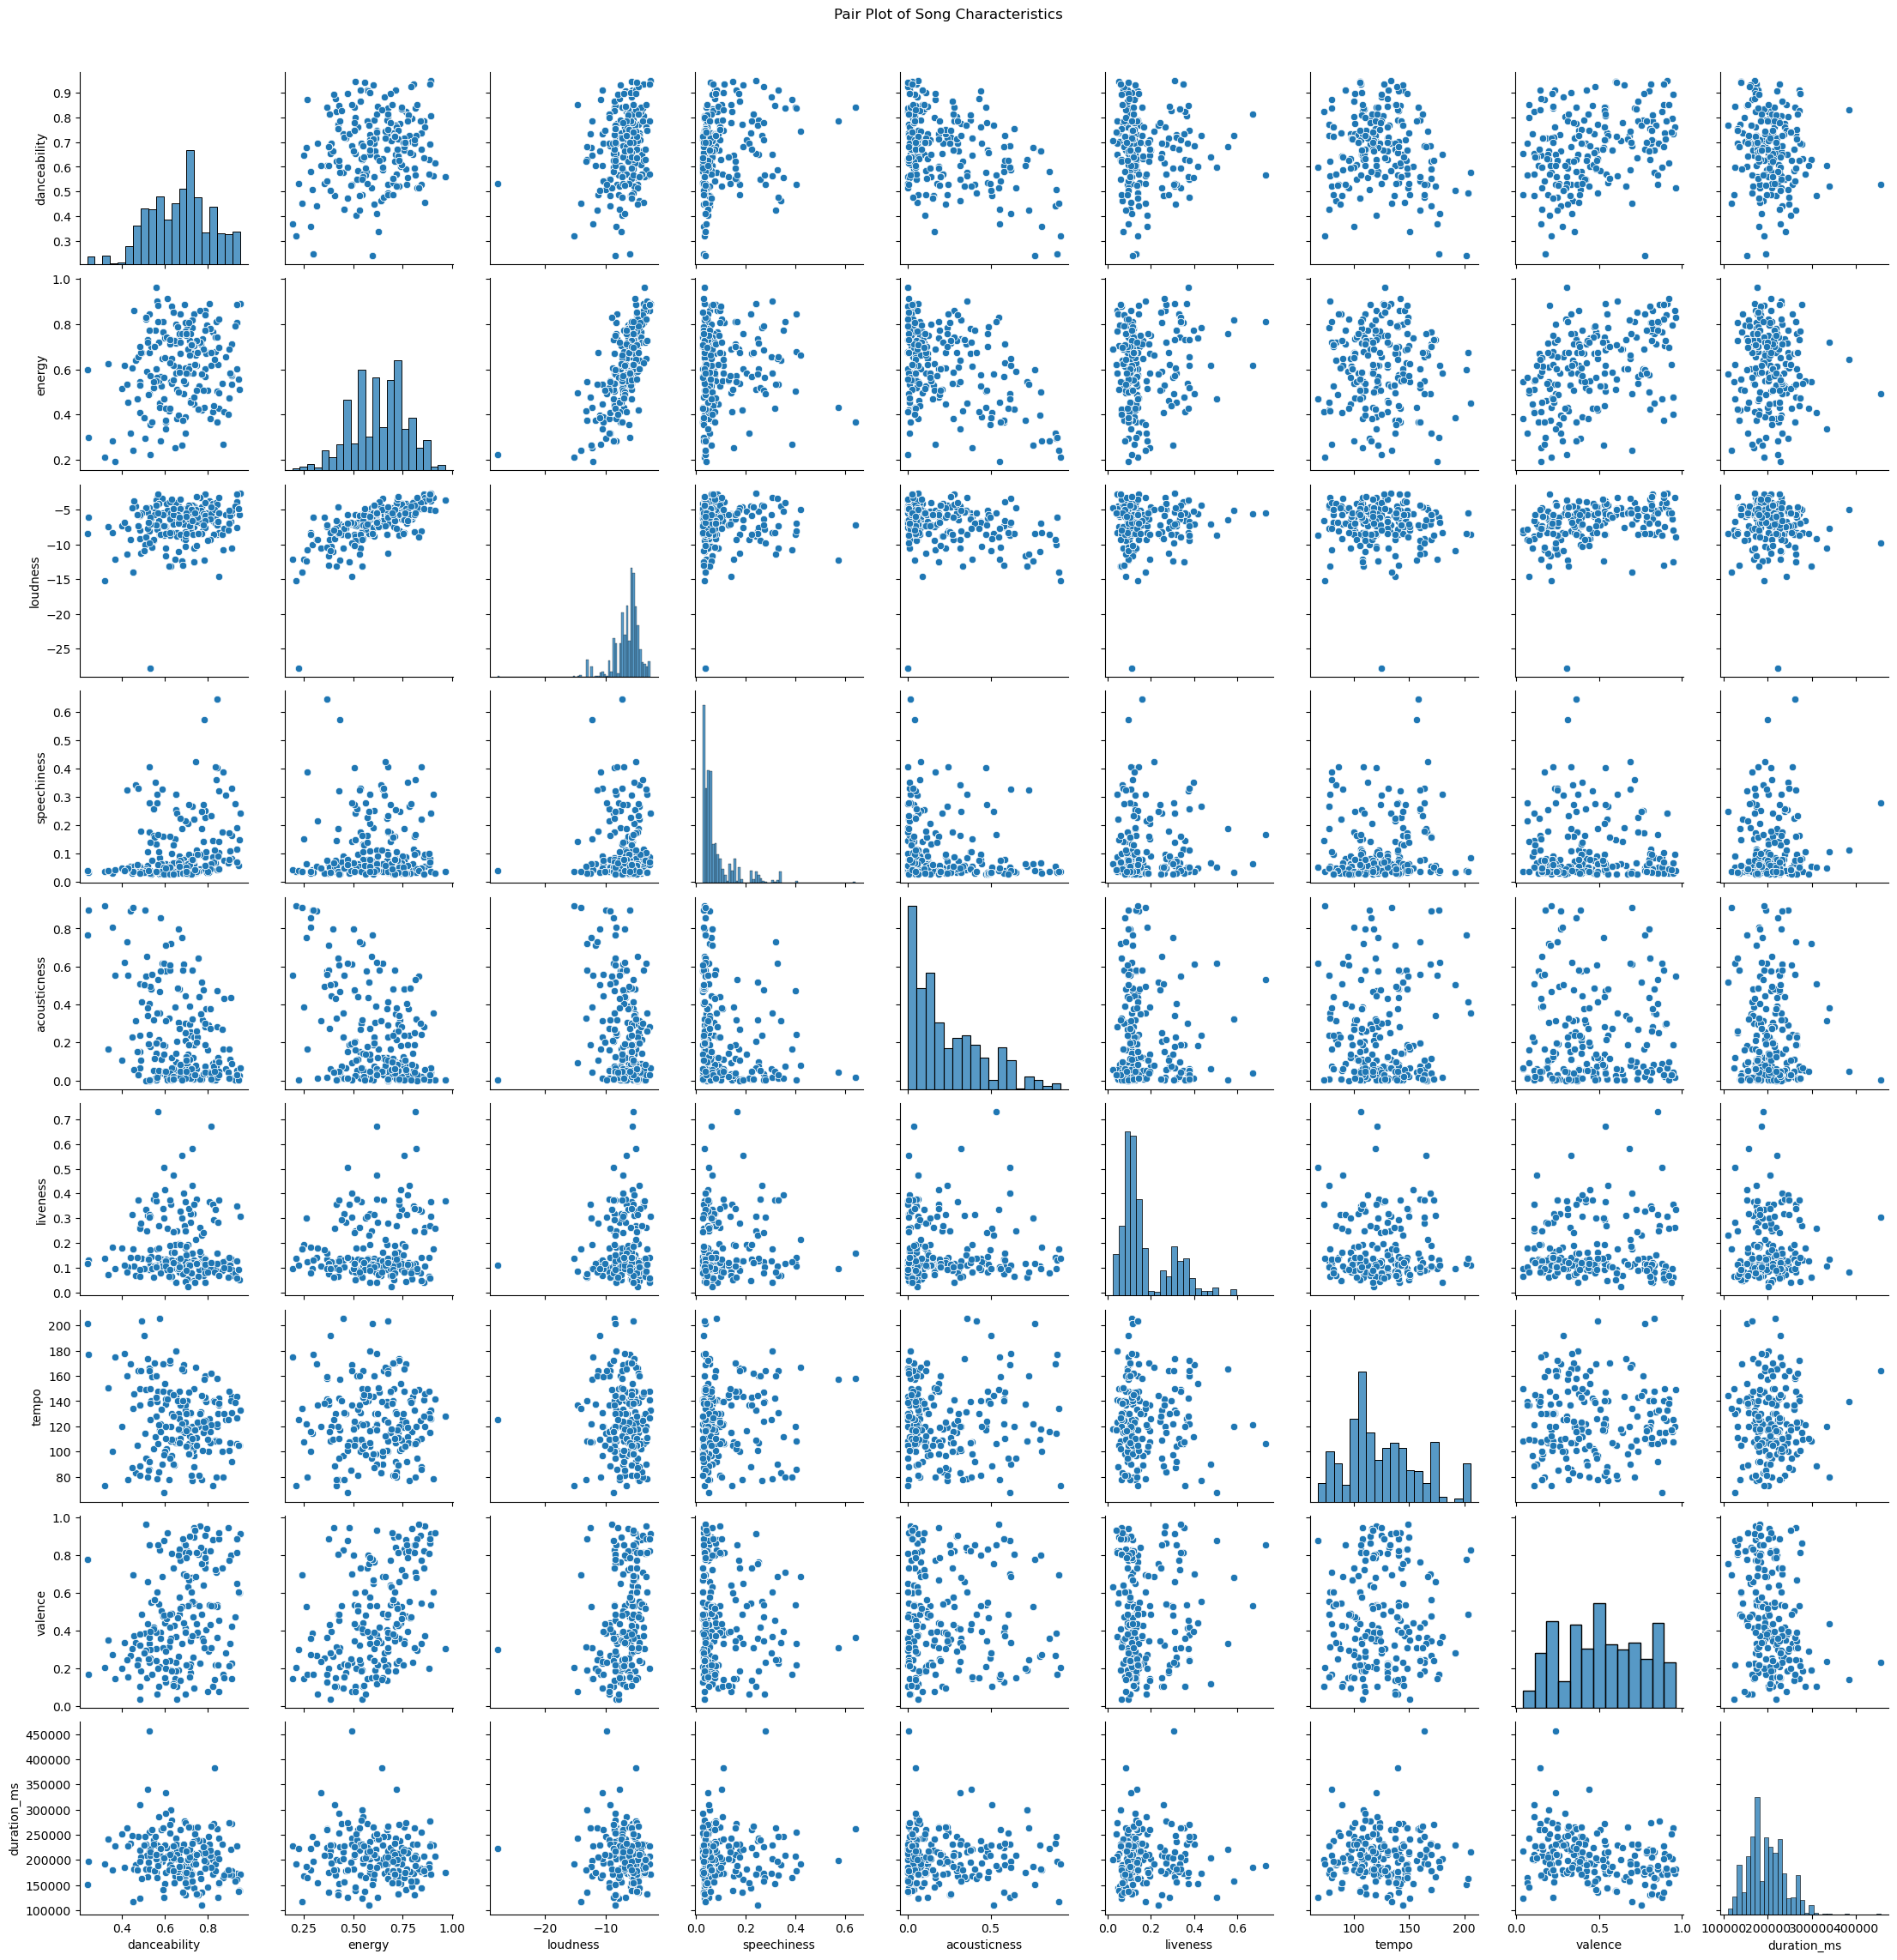

In [33]:
sns.pairplot(df[columns_to_convert])
plt.suptitle('Pair Plot of Song Characteristics', y=1.02)
plt.show()

In [34]:
# Calculate the correlation matrix
corr_matrix = df[columns_to_convert].corr()

print(corr_matrix)

              danceability    energy  loudness  speechiness  acousticness  \
danceability      1.000000  0.132894  0.152265     0.123995     -0.351790   
energy            0.132894  1.000000  0.632171    -0.005177     -0.370648   
loudness          0.152265  0.632171  1.000000     0.040603     -0.404016   
speechiness       0.123995 -0.005177  0.040603     1.000000     -0.217168   
acousticness     -0.351790 -0.370648 -0.404016    -0.217168      1.000000   
liveness          0.011052  0.124962 -0.000257     0.000462     -0.043840   
tempo            -0.398095  0.071464 -0.014337    -0.044450      0.124018   
valence           0.282646  0.389630  0.138295    -0.126985      0.039355   
duration_ms      -0.048318 -0.184113 -0.211781     0.073410      0.033639   

              liveness     tempo   valence  duration_ms  
danceability  0.011052 -0.398095  0.282646    -0.048318  
energy        0.124962  0.071464  0.389630    -0.184113  
loudness     -0.000257 -0.014337  0.138295    -0.211781

In [35]:
#correlation between danceability and energy
corr_danceability_energy = df['danceability'].corr(df['energy'])

print(f'Correlation between Danceability and Energy: {corr_danceability_energy}')

Correlation between Danceability and Energy: 0.1328937846665586


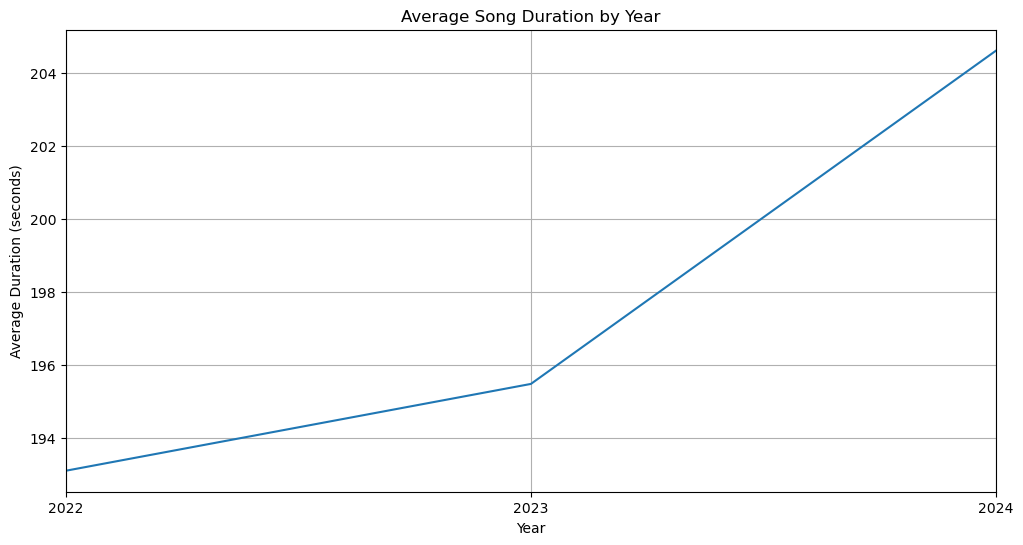

In [36]:
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')

# average song duration
average_duration_per_year = df.resample('YE')['duration_ms'].mean() / 1000  # Convert ms to seconds
plt.figure(figsize=(12, 6))
average_duration_per_year.plot(kind='line')
plt.title('Average Song Duration by Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (seconds)')
plt.grid(True)
plt.show()

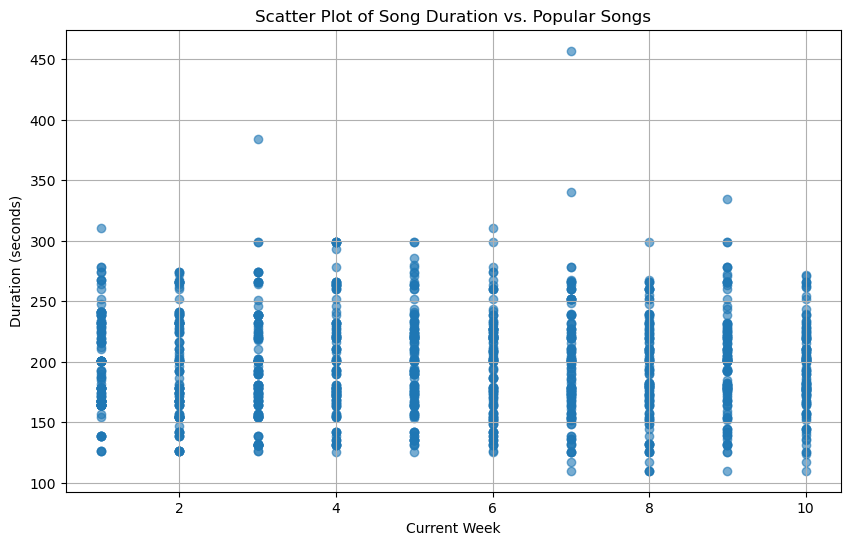

In [101]:
# Scatter plot of duration vs. popular songs
plt.figure(figsize=(10, 6))
plt.scatter(df['current_week'], df['duration_ms'] / 1000, alpha=0.6)
plt.xlabel('Current Week')
plt.ylabel('Duration (seconds)')
plt.title('Scatter Plot of Song Duration vs. Popular Songs')
plt.grid(True)
plt.show()

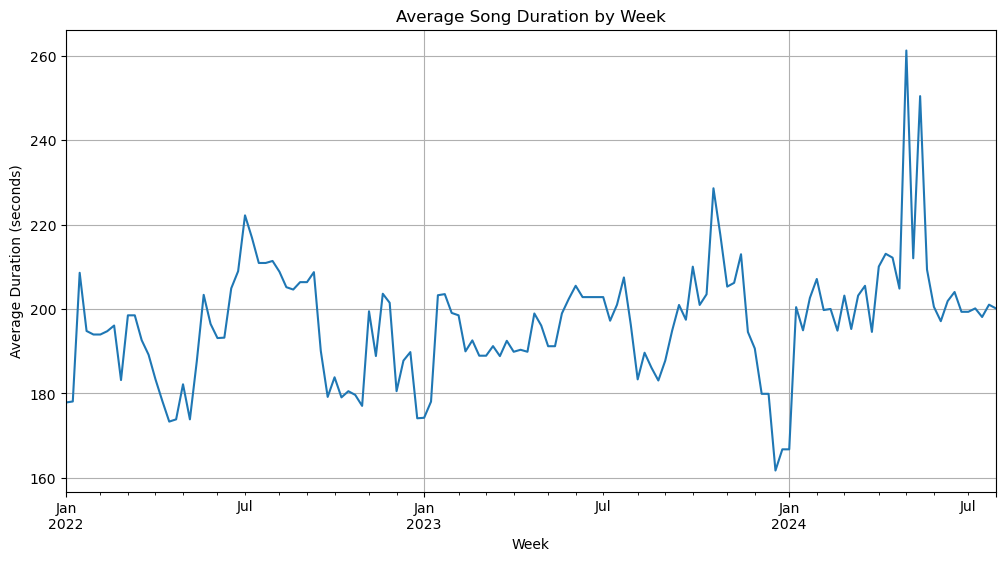

In [103]:

# song average duration by weeks over time, calculating weekly average
weekly_average_duration = df.resample('W')['duration_ms'].mean() / 1000  # Convert ms to seconds
plt.figure(figsize=(12, 6))
weekly_average_duration.plot(kind='line')
plt.title('Average Song Duration by Week')
plt.xlabel('Week')
plt.ylabel('Average Duration (seconds)')
plt.grid(True)
plt.show()

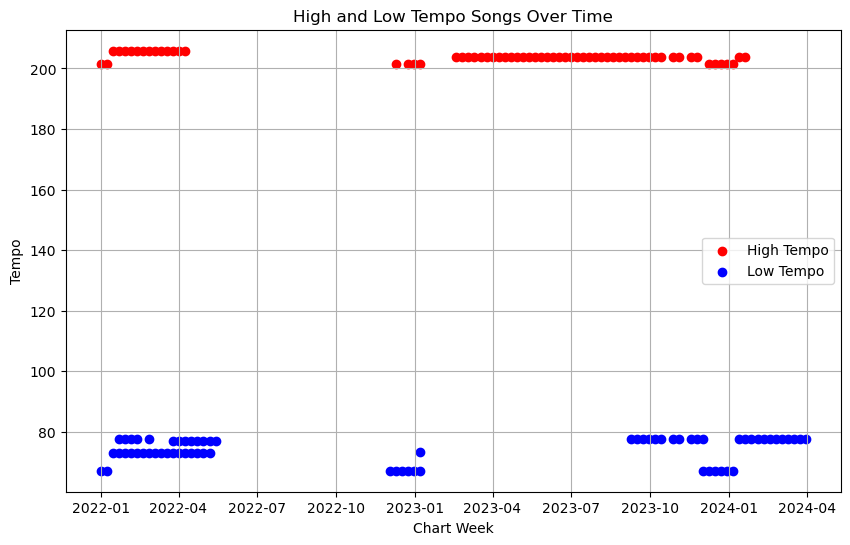

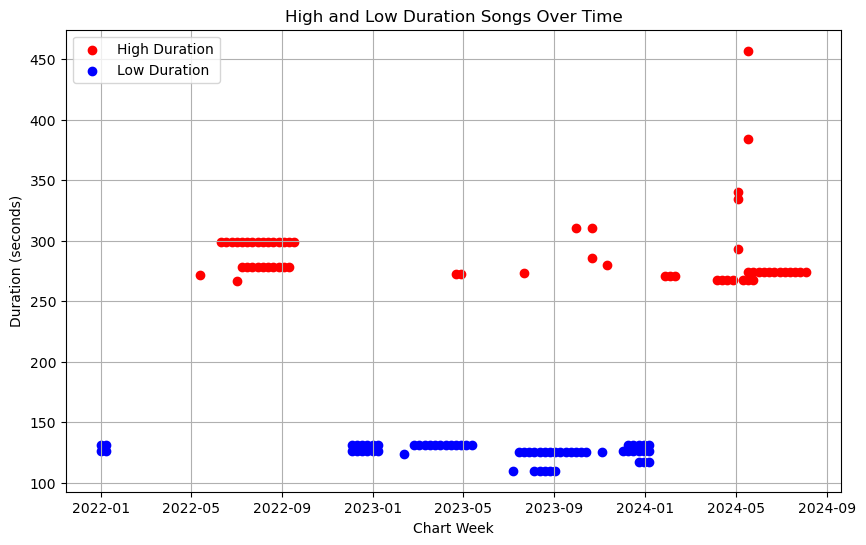

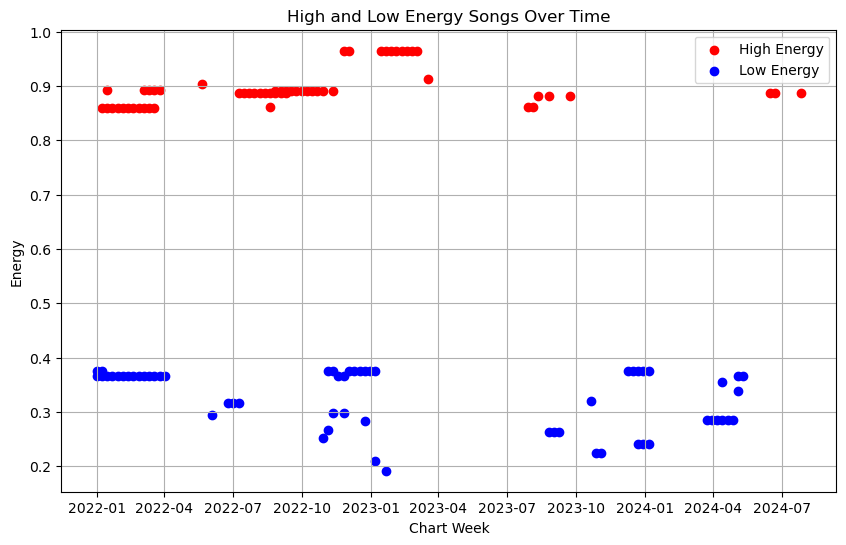

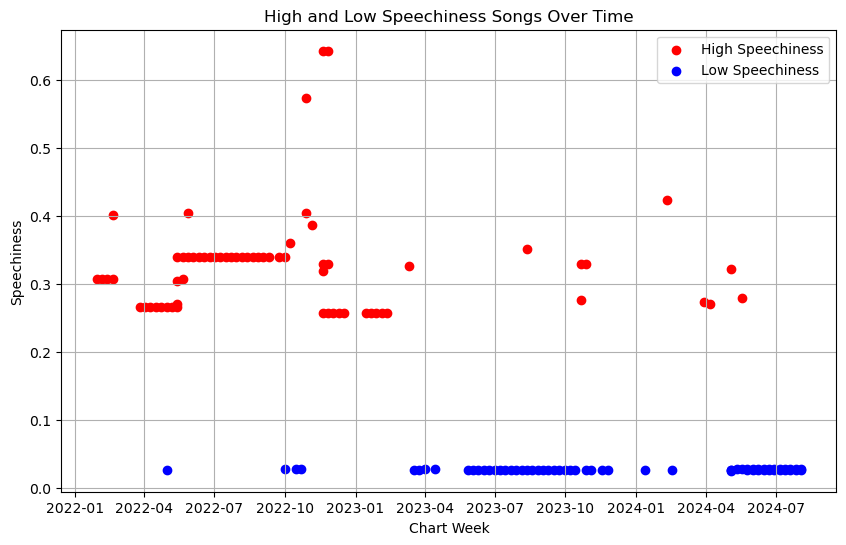

In [96]:
# Define outliers 
high_tempo_songs = df[df['tempo'] > df['tempo'].quantile(0.95)]
low_tempo_songs = df[df['tempo'] < df['tempo'].quantile(0.05)]
high_duration_songs = df[df['duration_ms'] > df['duration_ms'].quantile(0.95)]
low_duration_songs = df[df['duration_ms'] < df['duration_ms'].quantile(0.05)]
high_energy_songs = df[df['energy'] > df['energy'].quantile(0.95)]
low_energy_songs = df[df['energy'] < df['energy'].quantile(0.05)]
high_speechiness_songs = df[df['speechiness'] > df['speechiness'].quantile(0.95)]
low_speechiness_songs = df[df['speechiness'] < df['speechiness'].quantile(0.05)]


# Plot high and low tempo songs
plt.figure(figsize=(10, 6))
plt.scatter(high_tempo_songs.index, high_tempo_songs['tempo'], color='r', label='High Tempo')
plt.scatter(low_tempo_songs.index, low_tempo_songs['tempo'], color='b', label='Low Tempo')
plt.xlabel('Chart Week')
plt.ylabel('Tempo')
plt.title('High and Low Tempo Songs Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot high and low duration songs
plt.figure(figsize=(10, 6))
plt.scatter(high_duration_songs.index, high_duration_songs['duration_ms'] / 1000, color='r', label='High Duration')
plt.scatter(low_duration_songs.index, low_duration_songs['duration_ms'] / 1000, color='b', label='Low Duration')
plt.xlabel('Chart Week')
plt.ylabel('Duration (seconds)')
plt.title('High and Low Duration Songs Over Time')
plt.legend()
plt.grid(True)
plt.show()


# Plot high and low energy songs
plt.figure(figsize=(10, 6))
plt.scatter(high_energy_songs.index, high_energy_songs['energy'], color='r', label='High Energy')
plt.scatter(low_energy_songs.index, low_energy_songs['energy'], color='b', label='Low Energy')
plt.xlabel('Chart Week')
plt.ylabel('Energy')
plt.title('High and Low Energy Songs Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot high and low speechiness songs
plt.figure(figsize=(10, 6))
plt.scatter(high_speechiness_songs.index, high_speechiness_songs['speechiness'], color='r', label='High Speechiness')
plt.scatter(low_speechiness_songs.index, low_speechiness_songs['speechiness'], color='b', label='Low Speechiness')
plt.xlabel('Chart Week')
plt.ylabel('Speechiness')
plt.title('High and Low Speechiness Songs Over Time')
plt.legend()
plt.grid(True)
plt.show()